In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').show();
 } else {
 $('div.input').hide();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [502]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool
from scipy.interpolate import griddata
def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

# Cluster Analysis in SuSi

There are some important functions in susi for cluster analysis. 

## Radial Distribution function 

<IPython.core.display.Javascript object>


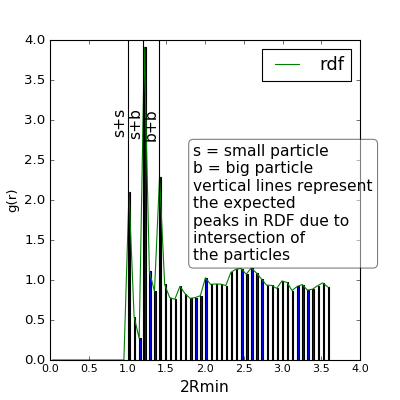

In [398]:
def rdf( phival, shearrate, bins):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-10])

    positions = dataset.particles.r
    fluid_velocity = dataset.fluid.u
    L = dataset.L # Domain size
    LEs = dataset.LEs  # Lees-Edwards shift at time dataset.t
    LEu = dataset.LEu  # Lees-Edwards velocity

    sim_chars = sp.susi.extract_sim_characteristics(dataset)
    sim_chars['histogram'] = {'bins': bins, 'range': (0, 2.8376564979553224e-05)}

    rdf = sp.spatial.radial_distribution_function(positions,**sim_chars)
    plt.figure(figsize=[5,5])
    plt.plot(rdf[0]/(2*np.min(sim_chars['radius'])),rdf[1],"g",label="rdf")
    plt.bar(rdf[0]/np.min(2*np.min(sim_chars['radius'])),rdf[1],width = 1.0/sim_chars['histogram']['bins'])
#     plt.axhline(1.0,color="r",label="probability 1")

    # s = sim_chars['radius'].min()
    # b = sim_chars['radius'].max()

    s = 4
    b = 11.2/2
    import inspect, re

    def plot_vline(loc, text):
        plt.axvline(loc/float(2*s),linewidth=1,color="k")
        plt.text(loc/float(2*s),3,text, ha = 'right',rotation=90,fontsize=14)

    plot_vline(s+s,"s+s")
    plot_vline(s+b,"s+b")
    plot_vline(b+b,"b+b")

    # plot_vline(s+s+s,"s+s+s")
    # plot_vline(s+s+b,"s+s+b")
    # plot_vline(s+b+b,"s+b+b")
    # plot_vline(b+b+b,"b+b+b")

    # plot_vline(s+s+s+s,"s+s+s+s")
    # plot_vline(s+s+s+b,"s+s+s+b")
    # plot_vline(s+s+b+b,"s+s+b+b")
    # plot_vline(s+b+b+b,"s+b+b+b")
    # plot_vline(b+b+b+b,"b+b+b+b")

    plt.legend(prop={'size':16})
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    plt.text(1.85, 2.7, "s = small particle \nb = big particle \nvertical lines represent the expected \npeaks in RDF due to intersection of \nthe particles"
             , fontsize=14, verticalalignment='top', bbox=props, wrap=True)
    plt.xlabel("2Rmin",fontsize=14)
    plt.ylabel("g(r)")
    plt.xticks(fontsize=10)
#     plt.title(path)
    #plt.savefig("radial_distribution_function")


v = interactive(rdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                bins=(10,100), __manual=False)

display(v)

---------------------------------------

---------------------------------------


In [ ]:
# dataset = sp.reader.DataSet(path,particles=True, fluid=True)
# sim_chars = sp.susi.extract_sim_characteristics(dataset)
# sim_chars['histogram'] = {'bins': 100, 'range': (0, 2.8376564979553224e-05)}
# sim_chars['histogramdd']={"bins":(20, 20, 20)}
# pdf = sp.spatial.pair_distribution_function(positions,**sim_chars)



In [ ]:
from matplotlib.patches import Circle  # $matplotlib/patches.py

def circle( xy, radius, color="lightsteelblue", facecolor="none", alpha=1, ax=None ):
    """ add a circle to ax= or current axes
    """
        # from .../pylab_examples/ellipse_demo.py
    e = Circle( xy=xy, radius=radius )
    if ax is None:
        ax = plt.gca()  # ax = subplot( 1,1,1 )
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_edgecolor( color )
    e.set_facecolor( facecolor )  # "none" not None
    e.set_alpha( alpha )
    
def plot_pdf(path):
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    sim_chars['histogramdd']={"bins":(30,30,30)}
    pdf2d = filter.PairDistributionFunction2D(dataset,**sim_chars)
    X = pdf2d[0]/1e-6
    Y = pdf2d[1]/1e-6
    Z = pdf2d[2]
    plt.figure()
    im = plt.imshow(Z, extent=(X.min(), X.max(), Y.max(), Y.min()),interpolation='bicubic')


    plt.title(path)
    plt.colorbar(im)

# print np.sort(get_folder_list())
# s = 4
# b = 11.2/2
# for path in np.sort(get_folder_list()[:]):
#     try:
#         plot_pdf(path)
#     except Exception as e:
#         print e
#         continue

## Plot the radial distribution function g(r) as a function of distance


In [ ]:
path = 'rhor1_phi56_yd12.0/'
dataset = sp.reader.DataSet(path,particles=True, fluid=True)
dataset.load_state(dataset.tlist[-10])


exp = dataset
plt.figure();
# print exp.keys()
# sim_chars = sp.susi.extract_sim_characteristics(exp)
# sim_chars['histogram'] = {'bins': 1000, 'range': (0, 2.8376564979553224e-05)}
# exp['histogram'] = sim_chars['histogram']
# exp['bin'] = 1000
# print exp['bins']

distance, rdf = exp['radial_distribution_function']
plt.plot(distance * 1e6, rdf);
plt.xlabel('Distance $\mu{m}$',fontsize=15);
plt.ylabel('g(r)', fontsize=15);
plt.title('Radial Distribution Function', fontsize=20);

---------------------------------------


## Lampros standard code for PDF (pair distribution function) at one time step

In [ ]:
def lampros_pdf(phival, shearrate, t):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[t])
    exp = dataset

    plt.figure();
    distance, pdf = exp['pair_distribution_function']

    XX, ZZ = np.meshgrid(distance[0], distance[2])
    pdf = pdf[:, pdf.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pdf)
    plt.colorbar()
    y_mum = 1e6 * distance[1][pdf.shape[1] / 2]

    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at t = '+str(t)+'$y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

v = interactive(lampros_pdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                t=(-1000,-1,1), __manual=True)

display(v)

---------------------------------------


# Lampros code averged over time range

In [ ]:
f = FloatProgress(min=0, max=100)
display(f)
L = widgets.Label("")
display(L)
def lampros_pdf(phival, shearrate, trange):
    path = "rhor1_phi"+str(phival)+"_yd"+str(float(shearrate))+"/"
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[-1])
    exp = dataset
    distance, pdf = exp['pair_distribution_function']
    XX, ZZ = np.meshgrid(distance[0], distance[2])
    pdf = pdf[:, pdf.shape[1] / 2, :]    
    XX_tot, ZZ_tot, pdf_tot = np.zeros_like(XX),np.zeros_like(ZZ), np.zeros_like(pdf)
    n = 0.0
    for i,t in enumerate(range(trange[1],trange[0],-1)):
        n+= 1.0
        f.value = float(i+1)/len(range(trange[1],trange[0],-1))*100
        L.value = "snapshot at t ="+str(dataset.tlist[t])
        dataset.load_state(dataset.tlist[t])
        exp = dataset
 
        distance, pdf = exp['pair_distribution_function']
        XX, ZZ = np.meshgrid(distance[0], distance[2])
        pdf = pdf[:, pdf.shape[1] / 2, :]
        XX_tot += XX
        ZZ_tot += ZZ
        pdf_tot += pdf
    plt.figure();
    XX_tot, ZZ_tot, pdf_tot = XX_tot/n, ZZ_tot/n, pdf_tot/n
    plt.pcolor(XX_tot.T * 1e6, ZZ_tot.T * 1e6, pdf_tot)
    plt.colorbar()
    y_mum = 1e6 * distance[1][pdf_tot.shape[1] / 2]

    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.1f} \mu{{m}}$'.format(y_mum), fontsize=20);

v = interactive(lampros_pdf, \
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value = 12),\
                trange=widgets.IntRangeSlider(value=[-10, -1], max=-1, min=-1000.0),__manual=True)
                
display(v)

---------------------------------------


## Eric Code for PDF at one time step

In [ ]:
# Eric's code for a PDF with higher resolution
from matplotlib.colors import LogNorm

path = 'rhor1_phi56_yd1.0/'
type = "xy"

def plot_pdf_one_timestep(phi,shearrate,time,bins):
    try:
        time = int(time)
        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
        dataset = sp.reader.DataSet(path,particles=True, fluid=True)
        dataset.load_state(dataset.tlist[time])
        exp = dataset

        #Create the size of the area that you want to bin the distances in
        limit = 5 * exp.particles.radius.max()
#         print (exp.particles.radius.max())
#         print (limit)
    #     bins = 41
        global edges
        global pair_df
        (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
             L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
    except:
        print "Unexpected error:", sys.exc_info()[0]
        raise


def plot_plot_pdf_one_timestep(phi,shearrate,time ,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show=True):
    if show:
        plt.ion()
    else:
        plt.ioff()
        
    if analyze_:
        plot_pdf_one_timestep(phi,shearrate,time,bins)

    #Calculate the distances and bin them

    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges

    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
#     plt.figure(figsize=[17,5])
#     plt.figure(figsize=[3.4*size,1*size])
    plt.figure(figsize=[3*size,3*size])
    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax = xz_vmax)#, vmin=0, vmax=10
#     plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,norm=LogNorm(vmin=0.01,vmax = xz_vmax))#, vmin=0, vmax=10
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$');
    plt.ylabel('$\Delta{z}$ $(\mu{m})$');
    plt.title('PDF at t='+str(time)+'$y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum));
#     print "ymum="+str(y_mum)

#X-Y PLANE

    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax = xy_vmax)
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$');
    plt.ylabel('$\Delta{y}$ $(\mu{m})$');
#         plt.title('PDF at t='+str(time)+'$z={:.2f} \mu{{m}}$'.format(z_mum));
    plt.title('PDF at t='+str(time)+'$z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum));
#Y-Z PLANE

    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax = yz_vmax)
    plt.colorbar()
#         x_mum = 1e6 * edges[0][pair_df.shape[0] / 2]
    x_mum = 1e6 * ( edges[0][1] -edges[0][0] )  
    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$');
    plt.ylabel('$\Delta{z}$ $(\mu{m})$');
    plt.tight_layout()
#         plt.title('PDF at t='+str(time)+'$x={:.2f} \mu{{m}}$'.format(x_mum));
    plt.title('PDF at t='+str(time)+'$x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum));
    
    plt.subplot(224)
    nufilepath = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))+"/result/nu_t.dat"
    db = pd.read_csv(nufilepath)
    plt.plot(db[db.columns[2]])
    plt.axvline(time)
    plt.xlabel("timestep")
    plt.ylabel("Viscosity Pa.s")
    plt.yscale("log")
    
    name = "plots/cluster_analysis_phi"+str(phi)+"_yd"+str(shearrate).replace('.','_')+"_t"+str(int(time))
#     print name 
    plt.savefig(name)


v = interactive(plot_plot_pdf_one_timestep, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                #time = widgets.IntSlider(min= -1000, max= -1,value = -1, step = -1,orientation = "vertical"),\
                #time = widgets.IntSlider(max= 1000, min= 1,value = 1, step = 1,orientation = "vertical"),\
                time = widgets.FloatText(value=1),\
                bins = widgets.IntSlider(min = 11,max = 101,value = 31, step = 1,orientation = "vertical"),\
                size = widgets.FloatSlider(min = 1,max = 10,value = 3.75, step = 0.25,orientation = "vertical"),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.widget_bool.Checkbox(value=True,description= "Analyze?"),\
                __manual=True)
display(widgets.VBox(v.children[:2]))
display(widgets.HBox(v.children[2:-1]))
display(widgets.HBox(v.children[-1:]))
display(widgets.Label(value = "Run analyze every time you change the dataset. No need to analyze when changing plot charecteristics"))

## plot pdf of a range of snaphots and animate 

In [ ]:
progress = widgets.IntProgress(value=0)
def plot_time_frames(phi,shearrate,tmin, tmax ,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show):
    for plot_time_frames_progress,time in enumerate(range(tmin, tmax)):
        progress.value = float(plot_time_frames_progress)/len(range(tmin, tmax))*100
        plot_plot_pdf_one_timestep(phi,shearrate,time,xz_vmax,xy_vmax,yz_vmax,bins,analyze_,size,show)
        

v_plot_time_frames = interactive(plot_time_frames, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12.5),\
                #time = widgets.IntSlider(min= -1000, max= -1,value = -1, step = -1,orientation = "vertical"),\
                #time = widgets.IntSlider(max= 1000, min= 1,value = 1, step = 1,orientation = "vertical"),\
                tmin = widgets.widget_int.BoundedIntText(value=730,min=1,max=10000),\
                tmax = widgets.widget_int.BoundedIntText(value=735, min=1,max=10000),\
                bins = widgets.IntSlider(min = 11,max = 101,value = 31, step = 1,orientation = "vertical"),\
                size = widgets.FloatSlider(min = 1,max = 10,value = 3.75, step = 0.25,orientation = "vertical"),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 6, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.widget_bool.Checkbox(value=True,description= "Analyze?"),\
                show=widgets.Checkbox(value=False),\
                __manual=True)
display(widgets.VBox(v_plot_time_frames.children[:2]))
display(widgets.HBox(v_plot_time_frames.children[4:-1]))
display(widgets.HBox(v_plot_time_frames.children[2:4]))
display(widgets.HBox(v_plot_time_frames.children[-1:]))
display(progress)
display(widgets.Label(value = "Run analyze every time you change the dataset. \
                            No need to analyze when changing plot charecteristics"))
play = widgets.Play(disabled=False)
slider = widgets.IntSlider(min=v_plot_time_frames.children[2].value, max = v_plot_time_frames.children[3].value)
widgets.jslink((play, 'value'), (slider, 'value'))
widgets.jslink((slider, 'min'), (play, 'min'))
widgets.jslink((slider, 'max'), (play, 'max'))
display(widgets.HBox([play, slider]))

link3 = widgets.jslink((v_plot_time_frames.children[3], 'value'), (v_plot_time_frames.children[2], 'max'))
link4 = widgets.jslink((v_plot_time_frames.children[2], 'value'), (v_plot_time_frames.children[3], 'min'))
link1 = widgets.jslink((v_plot_time_frames.children[2], 'value'), (slider, 'min'))
link2 = widgets.jslink((v_plot_time_frames.children[3], 'value'), (slider, 'max'))


philabel = widgets.Label(value = "")
ydlabel = widgets.Label(value = "")
tminlabel = widgets.Label(value = "")
tmaxlabel = widgets.Label(value = "")
tlabel = widgets.Label(value = "")

# link5 = widgets.jslink((v.children[0], 'value'), (philabel, 'value'))
# link6 = widgets.jslink((v.children[1], 'value'), (ydlabel, 'value'))
# link7 = widgets.jslink((v.children[2], 'value'), (tminlabel, 'value'))
# link8 = widgets.jslink((v.children[3], 'value'), (tmaxlabel, 'value'))
# link9 = widgets.jslink((slider, 'value'), (tlabel, 'value'))
# display(philabel,ydlabel,tminlabel,tmaxlabel,tlabel)



filename = widgets.Label(value="")
def handle_data_change(change):
    filename.value =  "plots/cluster_analysis_phi"+str(v_plot_time_frames.children[0].value)+"_yd"+\
                    str(v_plot_time_frames.children[1].value).replace('.','_')+"_t"+str(slider.value)+".png"
for i in v_plot_time_frames.children:
    i.observe(handle_data_change, names='value')
    
slider.observe(handle_data_change,names='value')
display(filename)

from IPython.display import Image
# def handle_image_change(change):
#     if os.path.exists(filename.value):
#         pdf_figure = Image(filename.value)
# display(pdf_figure)
# slider.observe(handle_image_change,'value')

image = widgets.Image(value = "",width=800, height=800)
imagesize = widgets.IntText(value =400, description="image size")
widgets.jslink((imagesize,'value'),(image,'width'))
widgets.jslink((imagesize,'value'),(image,'height'))
display(imagesize)
display(image)
def handle_image_change(change):
    if os.path.exists(filename.value):
        image.value = open(filename.value).read()
        
slider.observe(handle_image_change,'value')

---------------------------------------


# Eric Code for average PDF over time

## TimeSeries Information Between snapshots

<IPython.core.display.Javascript object>


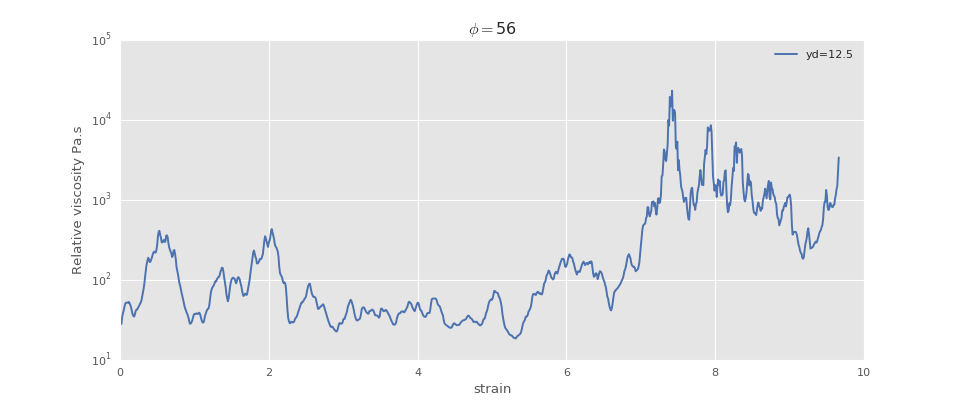

Total timesteps :965
Available timesteps :865


In [30]:

def plot_timeseries(phival,ydvals,vrange):
    plt.style.use('seaborn-deep')
    l = []
    phival = "phi"+str(phival)
    for f in get_folder_list():
        try:
            if f.split("_")[1] == phival:
                l.append(f)
        except:
            continue
    nufiles = [f+"/result/nu_t.dat" for f in l]
    plt.figure(figsize=[12,5])
    minshear = 100000
    for f in np.sort(nufiles):
        try:
            db = pd.read_csv(f)
            nu = db[db.columns[2]]
            nu_rel = db[db.columns[4]]
            t = db[db.columns[1]]
            shearrate = float(f.split("_")[2].split("/")[0].split("yd")[1])
            if shearrate in ydvals: 
                shear = t*shearrate
                if minshear > shear.max(): minshear = shear.max()
                plt.plot(shear[vrange[0]: vrange[1]],nu_rel[vrange[0]: vrange[1]],label="yd="+str(shearrate))
#                 print vrange[0]
#                 plt.plot(shear,nu_rel,label="yd="+str(shearrate))
                print "Total timesteps :"+str(len(shear))
                print "Available timesteps :"+str(int(len(shear) - len(shear)/float(shear.max())))
        except:
            continue
    plt.legend(loc="best")
    plt.title("$\phi=$"+str(phival).split('phi')[1])
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("Relative viscosity Pa.s")

#     plt.xlim([0,minshear])
    name = "comparison_viscosity_" + str(phival)+ '_'.join([str(i) for i in ydvals])
#     plt.savefig(name)

time_series = interactive(plot_timeseries, \
                vrange = widgets.IntRangeSlider(min = 0, max = 1500,value = [0,1000]),\
                phival = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                ydvals= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value=[12.0]),\
                __manual=False)

display(time_series)

## Plot averaged PDF

### PDF averaged over a over a time range 

Averaged PDF over a specified time range is plotted here.

In [2]:
# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = FloatProgress(min=0, max=100)

L = widgets.Label("")

display_cache_status = widgets.Label("")


def _plot_pdf_timerange(phi,time ,shearrate,bins = 41):
    cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    tmin, tmax = time[0], time[1]
    if tmax > len(dataset.tlist):
        tmax = len(dataset.tlist)
    step = 1.0
    global edges
    global pair_df
    
    for t in range(tmin,tmax,1):
        try:
            if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
                dataset.load_state(dataset.tlist[t])
                exp = dataset
                #Create the size of the area that you want to bin the distances in
                limit = 5 * exp.particles.radius.max()
        #         cachename = "pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_time"+str(t)
                #Calculate the distances and bin them
                (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                     L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
                datadict= dict()
                datadict["edges"] = edges
                datadict["pair_df"] = pair_df
                pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
                display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
            else:
                edges = pdfcache.load_data(t,"edges")
                pair_df = pdfcache.load_data(t,"pair_df")
                display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
            if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
            edges_tot += edges
            pair_df_tot += pair_df
            step += 1.0
            f.value = step/int(tmax-tmin+1)*100
            L.value = str(int(step/int(tmax-tmin+1)*100))+"% completed"
        except Exception as e:
            print e
            continue

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(phi,time ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_,autorange,save_fig):
    if analyze_:
        _plot_pdf_timerange(phi,time ,shearrate,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.figure(figsize=[10,10])

    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
        
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    if autorange== True: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    else: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    if autorange== True: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    else: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
    plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)
    tmin, tmax = time[0], time[1]
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    nupath = path + "/result/nu_t.dat"
    db = pd.read_csv(nupath)
    nu = db[db.columns[2]]
    nu_rel = db[db.columns[4]]
    t = db[db.columns[1]]
#     dt = abs(t[2]-t[1])
    shear = t*shearrate
    shear_tmin = t[tmin-1]*shearrate
    try:
        shear_tmax =  t[tmax-1]*shearrate
    except:
        shear_tmax =  t[len(t)-1]*shearrate
    print shear_tmin, shear_tmax
    plt.plot(shear, nu)
    
    plt.axvline(shear_tmin)
    plt.axvline(shear_tmax)
    plt.yscale("log")
    plt.ylabel("viscosity")
    plt.xlabel("strain")
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_trange"+str(tmin)+"_"+str(tmax))
        



pdf_average_timerange = interactive(plot_pdf_timerange, \
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                time = widgets.IntRangeSlider(min= 1, max= 1500,value = [0,1000], step = 1),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
display(widgets.VBox(pdf_average_timerange.children[0:3]))
display(widgets.HBox(pdf_average_timerange.children[3:-1]))
# display(widgets.HBox(pdf_average_timerange.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
display(pdf_average_timerange.children[-1])



## PDF averaged over a timesteps with a specific viscosity range 

PDF is calculated over all the timesteps that have a viscosity in a specific range  

In [3]:
# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = FloatProgress(min=0, max=100)
L = widgets.Label("")

display_cache_status = widgets.Label("starting the analysis....")

def _plot_pdf_timerange(path_addition,phi,viscosity_range ,shearrate,bins = 41):
    if not os.path.exists(path_addition+"cache/"):
        os.makedirs(path_addition+"cache/")
    cachefilename = path_addition+"cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    print cachefilename
    pdfcache = cache(cachefile=cachefilename)
    path = path_addition+"rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)

    min_viscosity = viscosity_range[0]
    max_viscosity = viscosity_range[1]
    
    
    nudata = pd.read_csv(path+"/result/nu_t.dat",names=["t","time", "nu","nu_var","nur","nur_var)"])
    idx_list = np.where((nudata["nur"] < max_viscosity) & (nudata["nur"] > min_viscosity) )[0]
    t_list = nudata["t"][idx_list]
#     print t_list
    
    global edges
    global pair_df
    step = 1 
    
    for t in idx_list:
        if t != 0:
            if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
                display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
                dataset.load_state(dataset.tlist[t])
                exp = dataset
                #Create the size of the area that you want to bin the distances in
                limit = 5 * exp.particles.radius.max()
        #         cachename = "pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_time"+str(t)
                #Calculate the distances and bin them
                (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                     L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
                datadict= dict()
                datadict["edges"] = edges
                datadict["pair_df"] = pair_df
                pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
            else:
                edges = pdfcache.load_data(t,"edges")
                pair_df = pdfcache.load_data(t,"pair_df")
                display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
            if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
            edges_tot += edges
            pair_df_tot += pair_df
            step += 1.0
            f.value = step/len(t_list)*100
            L.value = str(int(step/len(t_list)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(path_addition,phi,viscosity_range ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_,autorange, save_fig):
    
    if analyze_:
        _plot_pdf_timerange(path_addition,phi,viscosity_range ,shearrate,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.style.use("classic")
    plt.figure(figsize=[10,10])
    plt.suptitle('3D-PDF for $\phi=$'+str(phi)+"$\dot{\gamma}$="+str(shearrate), fontsize=15);
    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

#     plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
#     plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

#     plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    if autorange == True: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    else: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
#     plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

#     plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    if autorange == True: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    else: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15);
#     plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)
#     tmin, tmax = time[0], time[1]
    min_viscosity = viscosity_range[0]
    max_viscosity = viscosity_range[1]


    path = path_addition + "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    nupath = path + "/result/nu_t.dat"
    db = pd.read_csv(nupath,names=["t","time", "nu","nu_var","nur","nur_var)"])
    nu = db["nu"]
    nu_rel = db["nur"]
    t = db["time"]
    idx_list_valid = np.where((db["nur"] < max_viscosity) & (db["nur"] > min_viscosity) )[0]
    idx_list_invalid = np.where((db["nur"] > max_viscosity) | (db["nur"] < min_viscosity) )[0]

    
    #     dt = abs(t[2]-t[1])
    shear = t*shearrate
#     shear_tmin = t[tmin-1]*shearrate
    
    plt.plot(shear[idx_list_valid], nu_rel[idx_list_valid],'r.',label="data points used ")
    plt.plot(shear[idx_list_invalid], nu_rel[idx_list_invalid],'b.',label="data points not used")
    plt.legend(loc = 'best',prop={'size':8})
#     try:
#         shear_tmax =  t[tmax-1]*shearrate
#     except:
#         shear_tmax =  t[len(t)-1]*shearrate
        
#     print shear_tmin, shear_tmax
#     plt.plot(shear, nu)
    plt.yscale("log")
    plt.ylabel("relative viscosity")
    plt.xlabel("strain")
#     plt.tight_layout()
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_viscosity_range"+str(min_viscosity)+"_"+str(max_viscosity))
        



pdf_average_viscosity = interactive(plot_pdf_timerange, \
                path_addition = widgets.Text(value="./"),\
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.05,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.05,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.05,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                viscosity_range = widgets.IntRangeSlider(min= 1, max= 1e5,value = [1,1000], step = 1, description= "relative viscosity range"),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
display(widgets.VBox(pdf_average_viscosity.children[0:3]))
display(widgets.HBox(pdf_average_viscosity.children[3:-1]))
# display(widgets.HBox(pdf_average_viscosity.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
display(pdf_average_viscosity.children[-1])

# PDF side by side for comparison


1


<IPython.core.display.Javascript object>


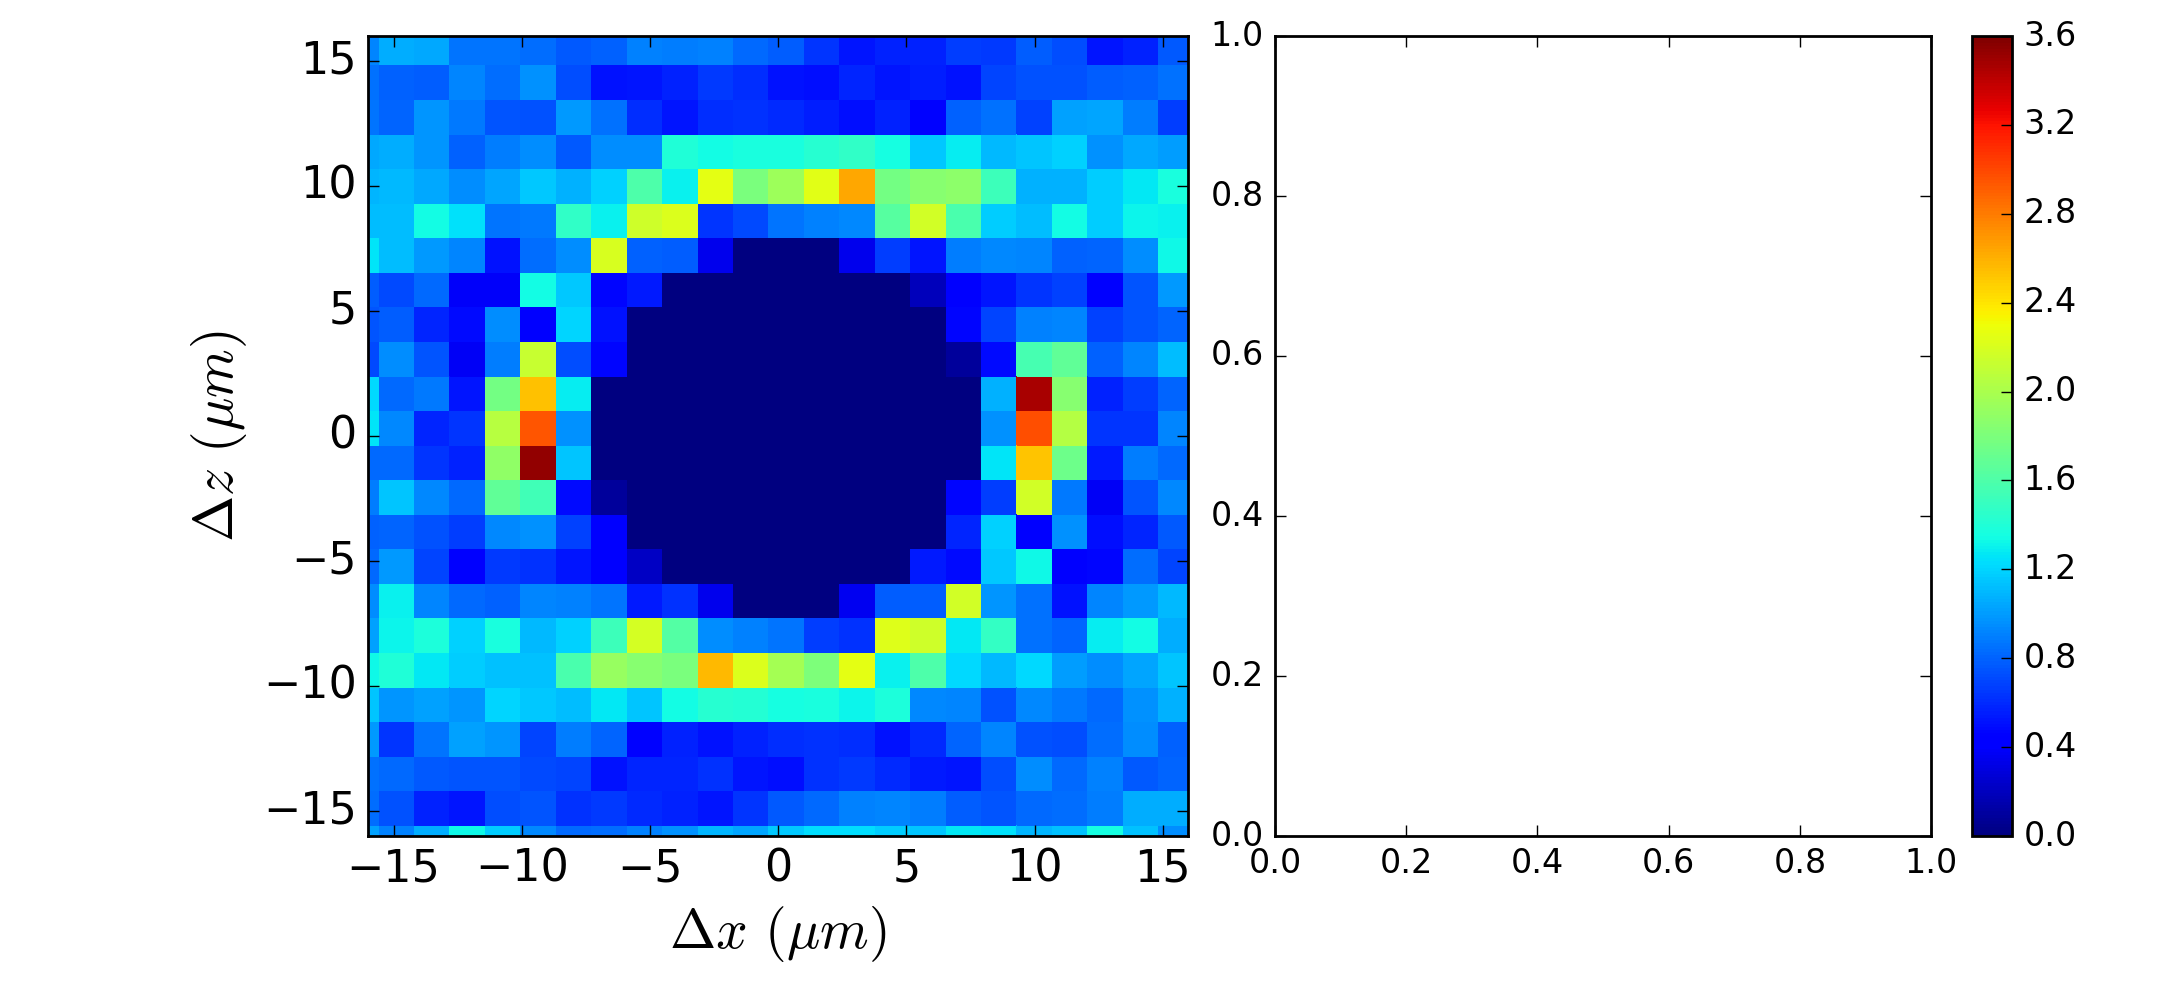

./cache/phi_55_shearrate_1_0.h5
ymum=1.38235463513


In [11]:
# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = FloatProgress(min=0, max=100)
L = widgets.Label("")

display_cache_status = widgets.Label("starting the analysis....")

def _plot_pdf_timerange(path_addition,phi,viscosity_range ,shearrate,bins = 41):
    if not os.path.exists(path_addition+"cache/"):
        os.makedirs(path_addition+"cache/")
    cachefilename = path_addition+"cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    print cachefilename
    pdfcache = cache(cachefile=cachefilename)
    path = path_addition+"rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)

    min_viscosity = viscosity_range[0]
    max_viscosity = viscosity_range[1]
    
    
    nudata = pd.read_csv(path+"/result/nu_t.dat",names=["t","time", "nu","nu_var","nur","nur_var)"])
    idx_list = np.where((nudata["nur"] < max_viscosity) & (nudata["nur"] > min_viscosity) )[0]
    t_list = nudata["t"][idx_list]
#     print t_list
    
    global edges
    global pair_df
    step = 1 
    
    for t in idx_list:
        if t != 0:
            if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
                display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
                dataset.load_state(dataset.tlist[t])
                exp = dataset
                #Create the size of the area that you want to bin the distances in
                limit = 5 * exp.particles.radius.max()
        #         cachename = "pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_time"+str(t)
                #Calculate the distances and bin them
                (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                     L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
                datadict= dict()
                datadict["edges"] = edges
                datadict["pair_df"] = pair_df
                pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
            else:
                edges = pdfcache.load_data(t,"edges")
                pair_df = pdfcache.load_data(t,"pair_df")
                display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
            if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
            edges_tot += edges
            pair_df_tot += pair_df
            step += 1.0
            f.value = step/len(t_list)*100
            L.value = str(int(step/len(t_list)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(path_addition,phi,viscosity_range ,shearrate_list,bins, xz_vmax,analyze_,autorange, save_fig):
    num_plot = len(shearrate_list)
    print num_plot
    plt.figure(figsize=[6.3*num_plot,5],dpi=200)
    plt.style.use("classic")
#     plt.suptitle('3D-PDF for $\phi=$'+str(phi)+"$\dot{\gamma}$="+str(shearrate), fontsize=15);
    
    for i,shearrate in enumerate(shearrate_list):
        plt.subplot(1,num_plot+1,i+1)
        if analyze_:
            _plot_pdf_timerange(path_addition,phi,viscosity_range ,shearrate,bins)
        #Plot them in a color mesh
        #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
        #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.
        #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
        max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
        new0=np.append(edges[0],max)
        new1=np.append(edges[1],max)
        new2=np.append(edges[2],max)

        # X-Z PLANE
        #Create the mesh grid, but shift by half a bin to correctly center the image
        XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
        pairdf = pair_df[:, pair_df.shape[1] / 2, :]

        if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
        else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
        
        y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

        plt.axis([-16,16,-16,16])
        plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=20);
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        if i ==0: plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=20);
        print "ymum="+str(y_mum)

    plt.tight_layout()
    plt.subplot(1,num_plot+1,num_plot+1)
    plt.colorbar()
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_viscosity_range"+str(min_viscosity)+"_"+str(max_viscosity))
        



pdf_average_viscosity = interactive(plot_pdf_timerange, \
                path_addition = widgets.Text(value="./"),\
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=50,disabled=False), \
                shearrate_list= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = [10,70,300]),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 3.0, step = 0.05,orientation = "vertical",description = "xz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                viscosity_range = widgets.IntRangeSlider(min= 1, max= 1e5,value = [1,100000], step = 1, description= "relative viscosity range"),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
display(widgets.VBox(pdf_average_viscosity.children[0:3]))
display(widgets.HBox(pdf_average_viscosity.children[3:-1]))
# display(widgets.HBox(pdf_average_viscosity.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
display(pdf_average_viscosity.children[-1])

## PDF averaged over timesteps with a specific 1st normal stress difference range

<IPython.core.display.Javascript object>


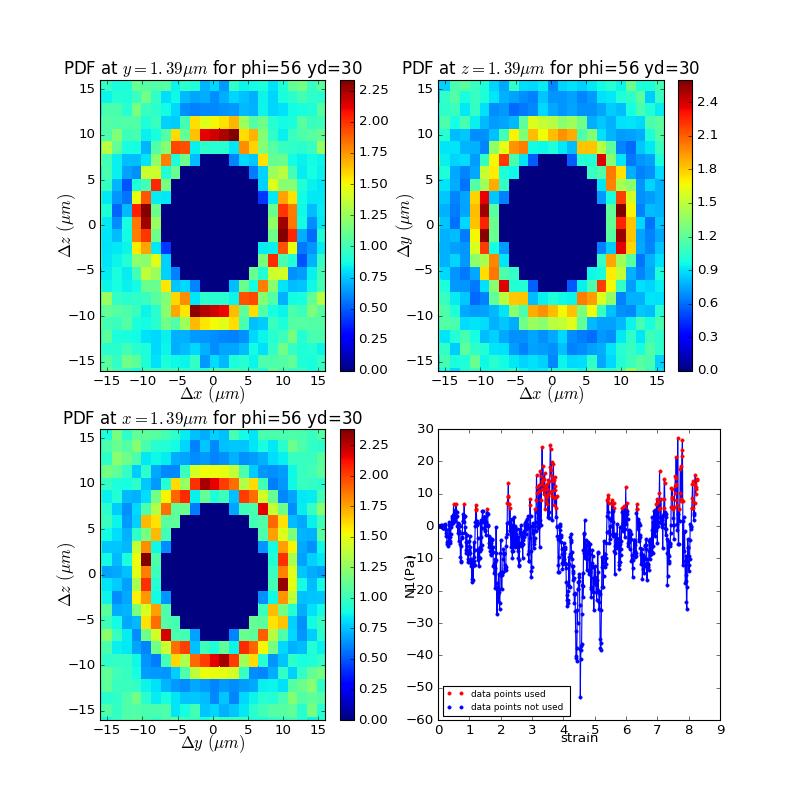

ymum=1.3852642885
825
825


In [5]:

# Eric's code for a PDF with higher resolution
from susipop.susi.cache import SusiCache as cache


f = widgets.FloatProgress(min=0, max=100)
L = widgets.Label("")
display_cache_status = widgets.Label("")

def _plot_pdf_timerange(path_addition,phi,N1_range ,shearrate,invert_range, bins = 41):
    if not os.path.exists(path_addition+"cache/"):
        os.makedirs(path_addition+"cache/")
    cachefilename = path_addition+"cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    pdfcache = cache(cachefile=cachefilename)
    path = path_addition+"rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)

    min_N1 = N1_range[0]
    max_N1 = N1_range[1]
    
    
    n1data = pd.read_csv(path+"/result/part_stress_norm_tot_t.dat")
    s11 = np.asarray(n1data[n1data.columns[2]])
    s22 = np.asarray(n1data[n1data.columns[3]])
    s33 = np.asarray(n1data[n1data.columns[4]])
    N1 = s11 - s33
    N2 = s33 - s22
    
    if not invert_range: idx_list = np.where((N1 < max_N1) & (N1 > min_N1) )[0]
    else: idx_list = np.where((N1 > max_N1) | (N1 < min_N1) )[0]
#     print idx_list
    global edges
    global pair_df
    step = 1 
    
    for t in idx_list:
        if t!= 0:
            if not pdfcache.has_data(t,"edges") and not pdfcache.has_data(t,"pair_df"):
                dataset.load_state(dataset.tlist[t])
                exp = dataset
                #Create the size of the area that you want to bin the distances in
                limit = 5 * exp.particles.radius.max()

                (edges, pair_df) = sp.spatial.correlations.pair_distribution_function(exp.particles.r,
                     L=exp.L, LEs=exp.LEs, histogramdd={"bins":(bins, bins, bins),"range":((-limit,limit),(-limit,limit),(-limit,limit))})
                datadict= dict()
                datadict["edges"] = edges
                datadict["pair_df"] = pair_df
                pdfcache.save_data(t,{"edges":edges, "pair_df":pair_df})
                display_cache_status.value ="saving data to cache: "+cachefilename+" for timestep :"+ str(t)
            else:
                edges = pdfcache.load_data(t,"edges")
                pair_df = pdfcache.load_data(t,"pair_df")
                display_cache_status.value = " loading from cache :"+cachefilename+" for timestep"+ str(t)
            if step == 1: edges_tot, pair_df_tot = np.zeros_like(edges), np.zeros_like(pair_df)
            edges_tot += edges
            pair_df_tot += pair_df
            step += 1.0
            f.value = step/len(idx_list)*100
            L.value = str(int(step/len(idx_list)*100))+"% completed"

    edges = edges_tot/step
    pair_df = pair_df_tot/step


def plot_pdf_timerange(path_addition,phi,N1_range ,shearrate,bins, xz_vmax,xy_vmax,yz_vmax,analyze_,autorange, save_fig,invert_range):
    
    if analyze_:
        _plot_pdf_timerange(path_addition,phi,N1_range ,shearrate,invert_range,bins)
    #Plot them in a color mesh
    #pcolor plots have a tendency to leave out one row/column of "pixels". It will not immediately plot the entire
    #range. To compensate, the defined meshgrid needs to be 1 "pont" bigger  than the image that you want.

    #Add a value to "edges" by first determining bin stepsize and then appending one step to edges
    max=edges[0][bins-1]+(edges[0][1]-edges[0][0])
    new0=np.append(edges[0],max)
    new1=np.append(edges[1],max)
    new2=np.append(edges[2],max)

    # X-Z PLANE
    #Create the mesh grid, but shift by half a bin to correctly center the image
    plt.figure(figsize=[10,10])

    plt.subplot(221)
    XX, ZZ = np.meshgrid(new0-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[:, pair_df.shape[1] / 2, :]

    if autorange == True: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=xz_vmax)
    else: plt.pcolor(XX.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
#         y_mum = 1e6 * edges[1][pair_df.shape[1] / 2]
    y_mum =  1e6 * ( edges[1][1] -edges[1][0] )    

    plt.axis([-16,16,-16,16])
#     plt.axis([-26,26,-26,26])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15,labelpad=-5);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15,labelpad=-10);
    plt.title('PDF at $y={:.2f} \mu{{m}}$ for phi='.format(y_mum)+str(phi)+" yd="+str(shearrate).format(y_mum), fontsize=15);
    print "ymum="+str(y_mum)

    #X-Y PLANE
    plt.subplot(222)
    XX, YY = np.meshgrid(new0-7.31208644e-07/2, new1-7.31208644e-07/2)
    pairdf = pair_df[:,:, pair_df.shape[2] / 2]

    if autorange == True: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf,vmin=0,vmax=xy_vmax)
    else: plt.pcolor(XX.T * 1e6, YY.T * 1e6, pairdf)
        
    plt.colorbar()
    z_mum = 1e6 * ( edges[2][1] -edges[2][0] )    

    plt.axis([-16,16,-16,16])
#     plt.axis([-26,26,-26,26])
    plt.xlabel('$\Delta{x}$ $(\mu{m})$', fontsize=15,labelpad=-5);
    plt.ylabel('$\Delta{y}$ $(\mu{m})$', fontsize=15,labelpad=-10);
    plt.title('PDF at $z={:.2f} \mu{{m}}$ for phi='.format(z_mum)+str(phi)+" yd="+str(shearrate).format(z_mum), fontsize=15);

    #Y-Z PLANE
    plt.subplot(223)
    YY, ZZ = np.meshgrid(new1-7.31208644e-07/2, new2-7.31208644e-07/2)
    pairdf = pair_df[pair_df.shape[0] / 2,:,:]

    if autorange == True: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf,vmin=0,vmax=yz_vmax)
    else: plt.pcolor(YY.T * 1e6, ZZ.T * 1e6, pairdf)
    plt.colorbar()
    x_mum = 1e6 *( edges[0][1] -edges[0][0] )    

    plt.axis([-16,16,-16,16])
#     plt.axis([-26,26,-26,26])
    plt.xlabel('$\Delta{y}$ $(\mu{m})$', fontsize=15,labelpad=-5);
    plt.ylabel('$\Delta{z}$ $(\mu{m})$', fontsize=15,labelpad=-10);
    plt.title('PDF at $x={:.2f} \mu{{m}}$ for phi='.format(x_mum)+str(phi)+" yd="+str(shearrate).format(x_mum), fontsize=15);
    
    plt.subplot(224)

    min_N1 = N1_range[0]
    max_N1 = N1_range[1]
    
    path = path_addition+"rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    n1data = pd.read_csv(path+"/result/part_stress_norm_tot_t.dat")
    s11 = np.asarray(n1data[n1data.columns[2]])
    s22 = np.asarray(n1data[n1data.columns[3]])
    s33 = np.asarray(n1data[n1data.columns[4]])
    t   = np.asarray(n1data[n1data.columns[1]])
    shear = t*shearrate
    N1 = s11 - s33
    N2 = s33 - s22
    plt.plot(shear,N1)
    if not invert_range:
        idx_list_valid = np.where((N1 < max_N1) & (N1 > min_N1) )[0]
        idx_list_invalid = np.where((N1 > max_N1) | (N1 < min_N1) )[0]
    else:
        idx_list_valid = np.where((N1 > max_N1) | (N1 < min_N1) )[0]
        idx_list_invalid = np.where((N1 < max_N1) & (N1 > min_N1) )[0]
        
    print len(N1)
    print len(s11)
    plt.ion()
    plt.plot(shear[idx_list_valid],N1[idx_list_valid],'r.', label = "data points used ")
    plt.plot(shear[idx_list_invalid],N1[idx_list_invalid],'b.', label = "data points not used ")
    plt.legend(loc = 'best', prop={'size':8} )
    plt.ylabel("N1(Pa)",labelpad=-10)
    plt.xlabel("strain",labelpad=-5)
    
    if save_fig:
        plt.savefig("pdf_phi_"+str(phi)+"_shearrate_"+str(shearrate).replace(".","_")+"_N1_range"+str(min_N1).replace(".","_")+"to"+str(max_N1).replace(".","_"))
        



pdf_average_N1 = interactive(plot_pdf_timerange, \
                path_addition = widgets.Text(value="./"),\
                phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
                shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                                 value = 12),\
                xz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.25,orientation = "vertical",description = "xz colorbax max"),\
                xy_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.25,orientation = "vertical",description = "xy colorbax max"),\
                yz_vmax = widgets.FloatSlider(min= 0, max= 15,value = 2.75, step = 0.25,orientation = "vertical",description = "yz colorbax max"),\
                analyze_ = widgets.ToggleButtons(options=[True,False],value = True,description= "Analyze?"),\
                save_fig = widgets.ToggleButtons(options=[True,False],value = False,description="Save figure?"),\
                autorange = widgets.ToggleButtons(options=[True,False],value = True,description="Manual color range?"),\
                invert_range = widgets.ToggleButtons(options=[True,False],value = False,description="Search inverse value range?"),\
                N1_range = widgets.FloatRangeSlider(min= -1e5, max= 1e5,value = [-10000.00,-1.00],  description= "N1 range"),\
                bins = widgets.IntSlider(options = [11,101],value = 41, step = 2,orientation = "vertical"),__manual=True)
#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
display(widgets.VBox(pdf_average_N1.children[0:4]))
display(widgets.HBox(pdf_average_N1.children[4:]))
# display(widgets.HBox(pdf_average_N1.children[7:-1]))
display(f)
display(L)
display(display_cache_status)
# display(pdf_average_N1.children[-1])

## Velocity autocorrelations

In [ ]:
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
# def scatter3d(x,y,z, cs, colorsMap='jet'):
#     cm = plt.get_cmap(colorsMap)
#     cNorm = mpl.colors.Normalize(vmin=min(cs), vmax=max(cs))
#     scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
#     scalarMap.set_array(cs)
#     fig.colorbar(scalarMap)
#     plt.show()
from scipy.interpolate import griddata
def intp(x,y,z,bins):
    H, xedges, yedges = np.histogram2d(x, y,bins=bins, weights=z)
    H = H.T  # Let each row list bins with common y range.
#     fig = plt.figure()
#     ax = fig.add_subplot(131, title='imshow: square bins')
    plt.imshow(H, interpolation='nearest', origin='low', extent = (min(x), max(x), min(y), max(y)))
#     plt.xlim([40,60])
#     plt.ylim([40,60])
    
f = FloatProgress(min=0, max=100)
L = widgets.Label("")
def _plot_vaf(phi,shearrate,timerange,bins):
    #cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    #pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    dataset.load_state(dataset.tlist[1])
    positions = dataset.particles.r
    velocities = dataset.particles.newton_velocity
#     print positions
#     print velocities
    vaf_pos = []
    vaf_val = []
#     timerange = np.asarray(timerange)
    timerange = list(timerange)
    print timerange
    tlist = dataset.tlist[timerange[0]:timerange[1]]
        
    for idx,t in enumerate(tlist):
        dataset.load_state(t)
        f.value = float(idx)/len(tlist)*100.0
        L.value = str(float(idx)/len(tlist)*100.0)
        for i,vi in enumerate(velocities):
            for j,vj in enumerate(velocities):
                if j!=i:
                    if np.linalg.norm(positions[j] - positions[i]) < 30e-6:
                        vaf_val.append(np.multiply(vi,vj))
                        vaf_pos.append(positions[j] - positions[i])
    vaf_pos = np.asanyarray(vaf_pos)
    vaf_val = np.asanyarray(vaf_val)
#     print vaf_pos.shape
#     print vaf_val.shape
    x = [i[0]*1e6 for i in vaf_pos]
    y = [i[1]*1e6 for i in vaf_pos]
    z = [i[2]*1e6 for i in vaf_pos]
    val_norm = [np.linalg.norm(i) for i in vaf_val]
    val_x = [i[0] for i in vaf_val]
    val_y = [i[1] for i in vaf_val]
    val_z = [i[2] for i in vaf_val]
    #scatter3d(x,y,z,val)
    plt.figure(figsize=[15,5])
    plt.subplot(1,3,1)
    intp(x,y,val_norm,bins)
#     plt.scatter(x,y, c = val_z ,alpha=0.03)
    plt.subplot(1,3,2)
    intp(x,z,val_norm,bins)
#     plt.scatter(x,z, c = val_y,alpha=0.03)
    plt.subplot(1,3,3)
    intp(y,z,val_norm,bins)
#     plt.scatter(y,z, c = val_x,alpha=0.03)
    plt.show()
vaf_average = interactive(_plot_vaf, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    timerange = widgets.IntRangeSlider(value = [1,3], min = 1, max = 1500,step = 1),\
    bins = widgets.IntSlider(min=1,max=300,value=100),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
display(vaf_average)
display(f)
display(L)



# Susi cluster analysis

## Visualization

## Single Particle Percent

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
from matplotlib import cm
from susipop.susi.cache import SusiCache as cache
def scatter3d(fig, x,y,z,cs):
#     cm = plt.get_cmap(colorsMap)
#     cNorm = mpl.colors.Normalize(vmin=min(cs), vmax=max(cs))
#     scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
#     fig = plt.figure()
#     ax = Axes3D(fig)
#     ax.scatter(x, y, z, color = cs)
#     scalarMap.set_array(cs)
#     fig.colorbar(scalarMap)
#     plt.show()
    ax = fig.gca(projection='3d')               # to work in 3d
    plt.hold(True)
    ax.scatter( x,y,z,color = cs)

f = widgets.FloatProgress(min=0,max=100)
progress_stat = widgets.Label(value = "")


def susi_cluster_analysis_Single_Particle_Percent(phi,shearrate,gap):
    #cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    #pdfcache = cache(cachefile=cachefilename)
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
    clustercache = cache(cachefile=cachefilename)
    dataset = sp.reader.DataSet(path,particles=True, fluid=True,cachefile=cachefilename)
#     timerange[1] = min(len(dataset.tlist)-2, timerange[1])
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    strain = np.asarray(viscosity_file[viscosity_file.columns[1]][1:])*shearrate
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    single_particle_percent = []
    print "max timestep =", len(dataset.tlist)-2
    for i,time_idx in enumerate(range(1, len(dataset.tlist))):
        f.value = float(i)/len((range(1, len(dataset.tlist))))*100
        progress_stat.value = str(float(i)/len((range(1, len(dataset.tlist))))*100)
        try:
            if not clustercache.has_data(dataset.tlist[time_idx],"single_particle_percent_gap_"+str(gap)):
                dataset.load_state(dataset.tlist[time_idx])
#                 sim_chars = sp.susi.extract_sim_characteristics(dataset)
#                 sim_chars = sp.susi.extract_sim_characteristics(dataset, **sim_chars)
#                 positions = dataset.particles.r
#                 clusters = sp.spatial.create_cluster(positions, **sim_chars)
#                 sim_chars["gap"] = gap
#                 clusters = sp.spatial.create_cluster(positions, **sim_chars)
#                 cluster_d = sp.spatial.cluster_size_distribution(positions,**sim_chars)
#                 particle_cluster_ids = sp.spatial.particleId_to_clusterId(positions, clusters=clusters)
            #     print clusters
        #         print map(len,clusters)
#                 spp = sp.spatial.single_particle_percentage(positions, cluster_distribution=cluster_d)
                spp = dataset.get_quantity("single_particle_percentage",update=True, gap=gap)
                single_particle_percent.append(spp)
                clustercache.save_data(dataset.tlist[time_idx],{"single_particle_percent_gap_"+str(gap):spp})
            else:
                single_particle_percent.append(clustercache.load_data(dataset.tlist[time_idx],"single_particle_percent_gap_"+str(gap)))
        except:
            continue
    min_size = min(len(viscosity),len(single_particle_percent))
    print "correlation between viscosity and percent single particles: ", np.corrcoef(single_particle_percent[:min_size], viscosity[:min_size])[0, 1]
    plt.figure(figsize=[15,5])
    plt.plot(strain[:min_size],np.ones_like(single_particle_percent[:min_size])-single_particle_percent[:min_size],label = "single particle fraction")
    plt.plot(strain[:min_size],viscosity[:min_size], label = "viscosity")
    plt.legend(loc="best")
    plt.yscale("log")
    plt.xlabel("strain")
    plt.ylabel("viscosity Pa.s / fraction of single particles")
    plt.title("Viscosity & single particle percent for min_gap = " + str(gap*1e6) + "$\mu$m" )
#         cluster_size_distribution = sp.spatial.cluster_size_distribution( positions,clusters=clusters, **sim_chars)
#     fig = plt.figure()
#     plt.hold(True)
#     for i in range(len(clusters)):
# #         print i
#         x = positions[list(clusters[i])].T[0]
#         y = positions[list(clusters[i])].T[1]
#         z = positions[list(clusters[i])].T[2]
# #         print x,y,z
#         if len(clusters[i]) == 1:
#             scatter3d(fig,[x],[y],[z], 'g')
#         else:
#             scatter3d(fig,x,y,z,'r')

    
    
    #positions[list(clusters[-1])].T[0]
    #plt.plot(positions[list(clusters[-1])].T[0], positions[list(clusters[-1])].T[2],'r.')
    #print cluster_size_distribution
    
    
susi_cluster_analysis_Single_Particle_Percent_widget = interactive(susi_cluster_analysis_Single_Particle_Percent, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 15),\
    timerange = widgets.IntRangeSlider(value = [100,800],min = 1, max =1000 ),\
    gap = widgets.FloatText(value=1e-8),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
display(susi_cluster_analysis_Single_Particle_Percent_widget)
display(f)
display(progress_stat)

/home/vsivadas/.local/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:

 This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.




In [ ]:

# dataset = reader.DataSet("rhor1_phi56_yd12.0/", particles=True, fluid=True)
# dataset.load_state(dataset.tlist[500])

# cluster_size_distribution = dataset.get_quantity("cluster_size_distribution",update=True, gap=2.5e-8)
# particle_cluster_ids = dataset.get_quantity("particle_cluster_ids",gap= 2e-8)
# clusters = dataset.get_quantity("clusters",gap= 2e-8)

# print "clusters\n" ,clusters
# print "cluster_size_distribution\n", cluster_size_distribution
# print "particle_cluster_ids\n",particle_cluster_ids, len(particle_cluster_ids)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# clrs = np.random.random((len(exp['clusters']), 3))
# c = clrs[exp['particle_cluster_ids'], :]
# pos = exp['positions'] * 1e6
# x, y, z = pos[:, 0], pos[:, 1], pos[:, 2]
# ax.scatter(x, y, z, c=c)

# plt.title ("Particles colored by cluster",fontsize=20);
# ax.set_xlabel('X ($\mu m$)',fontsize=15);
# ax.set_ylabel('Y ($\mu m$)',fontsize=15);
# ax.set_zlabel('Z ($\mu m$)',fontsize=15);

# ax.set_xlim(-(((exp.L[2]*1000000)/2)-((exp.L[0]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[0]*1000000)/2)));
# ax.set_ylim(-(((exp.L[2]*1000000)/2)-((exp.L[1]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[1]*1000000)/2)));
# ax.set_zlim(0, exp.L[2]*1000000);

# print ('Cluster Analysis Gap: ', exp['gap'])
# print ('Cluster Size Distribution: ', exp['cluster_size_distribution'])
# print ('Mean Cluster Size: ', exp['mean_cluster_size'])
# import plotly.plotly

In [115]:
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
import warnings
init_notebook_mode(connected=True)

# import plotly.plotly as py
# import plotly.graph_objs as go

def cluster_size_distribution_plotly(phi,shearrate,time,min_viscosity_state,max_viscosity_state, gap,minsize,pathinput):
    path = pathinput+"rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    min_visc_time= np.where(viscosity == min(viscosity[50:]))[0][0] 
    max_visc_time = np.where(viscosity == max(viscosity[50:]))[0][0] 
    if min_viscosity_state: 
        time = min_visc_time
    if max_viscosity_state:
        time = max_visc_time
    print "time =",time
    dataset.load_state(dataset.tlist[time])
#     gap = 4e-8
    clusters = dataset.get_quantity("clusters", gap = gap)
    s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
    pos = dataset['positions'] * 1e6
    print len(dataset.tlist), "steps available"
    data = []
    for i in range(len(s)):
        if ns[i] != 0:
            print "size=",s[i],  "clusters=",ns[i]
    if ns[-1] == dataset.npart: 
        print "all individual particles"
    else:
        import random
        r = lambda: str(random.randint(0,255))
    #     plt.figure()
        col = []
        for i in range(dataset.npart):
            col.append("rgb(" + r()+","+r()+","+r()+")")

        for cluster in clusters:
            if len(cluster) >= minsize:
                x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
                trace = Scatter3d(
                    x=x, y=y, z=z,
                    marker=dict(
                        size=20,
                        color=col[len(cluster)],
                        colorscale='Viridis',
                    ),
#                     line=dict(
#                         color=col[len(cluster)],
#                         width=0
#                     ),
                    name = "cluster size = "+str(len(cluster))
                )
                data.append(trace)
        # data = [trace]
        try:
            layout = dict(
                width=800,
                height=700,
                autosize=True,
            #     title='Iris dataset',
                scene=dict(
                    xaxis=dict(
                        gridcolor='rgb(255, 255, 255)',
                        zerolinecolor='rgb(255, 255, 255)',
                        showbackground=True,
                        backgroundcolor='rgb(230, 230,230)'
                    ),
                    yaxis=dict(
                        gridcolor='rgb(255, 255, 255)',
                        zerolinecolor='rgb(255, 255, 255)',
                        showbackground=True,
                        backgroundcolor='rgb(230, 230,230)'
                    ),
                    zaxis=dict(
                        gridcolor='rgb(255, 255, 255)',
                        zerolinecolor='rgb(255, 255, 255)',
                        showbackground=True,
                        backgroundcolor='rgb(230, 230,230)'
                    ),
                    camera=dict(
                        up=dict(
                            x=0,
                            y=0,
                            z=1
                        ),
                        eye=dict(
                            x=-1.7428,
                            y=1.0707,
                            z=0.7100,
                        )
                    ),
        #             aspectratio = dict( x=1, y=1, z=0.7 ),
                    aspectmode = 'manual'
                ),
            )

            fig = dict(data=data)

            iplot(fig)
        except Exception as e:
            
            print e

widget_cluster_size_distribution_plotly = interactive(cluster_size_distribution_plotly, \
    pathinput = widgets.Text(value = "./"),\
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    minsize = widgets.IntText(value = 3),\
    max_viscosity_state = widgets.ToggleButton(value= False),\
    min_viscosity_state = widgets.ToggleButton(value= False),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
display(widget_cluster_size_distribution_plotly)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

time = 100


In [ ]:
# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='vishnusivadasan7', api_key='ZLBPHF6HXSroNtji8tec')
# py.iplot([Scatter(x=[1,2,3], y=[5,8,9])])

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout

from plotly.graph_objs import *
import pandas as pd

print plotly.__version__

In [ ]:
def cluster_size_distribution_matplotlib(phi,shearrate,time,min_viscosity_state,max_viscosity_state, gap,minsize, connect):
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    min_visc_time= np.where(viscosity == min(viscosity[50:]))[0][0] 
    max_visc_time = np.where(viscosity == max(viscosity[50:]))[0][0] 
    if min_viscosity_state: 
        time = min_visc_time
        print "viscosity = ",viscosity[min_visc_time]
    if max_viscosity_state:
        time = max_visc_time
        print "viscosity = ", viscosity[max_visc_time]
    print "time =",time
    print dataset.npart, "particles used"
    dataset.load_state(dataset.tlist[time])
#     gap = 4e-8
    clusters = dataset.get_quantity("clusters", gap = gap)
    s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
    pos = dataset['positions'] * 1e6
    data = []
    
    for i in range(len(s)):
        if ns[i] != 0:
            print "size=",s[i],  "clusters=",ns[i]
    print (1-ns[0]/float(dataset.npart))*100, "% particles in cluster"
    if ns[-1] == dataset.npart: 
        print "all individual particles"
    else:
        fig = plt.figure(figsize=[10,10])
        ax = fig.add_subplot(111, projection='3d')
        import random
        import matplotlib.cm as cm
#          r = lambda: random.randint(0,255)
    #     plt.figure()
#         col = []
#         for i in range(dataset.npart*2):
#         color = cm.rainbow(np.linspace(0, 1, dataset.npart))
        color = [np.random.rand(1,3) for i in range(dataset.npart)]
#         color = random.shuffle(color)
        for cluster in clusters:
            if len(cluster) >= minsize:
                x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
                col = color[len(cluster)][0]
                print col
                ax.scatter(x, y, z, s = 400, c=col,depthshade=True)
#                 ax.scatter(x, y, z, s = 400, c=[str(len(cluster)) for i in  x] ,depthshade=True)
                if connect: ax.plot3D(x, y, z)
                plt.xlabel('x axis $\mu m $')
                plt.ylabel('y axis $\mu m $')
                ax.set_zlabel('z axis $\mu m $')
                ax.view_init(azim=-90, elev=0)
widget_cluster_size_distribution_matplotlib = interactive(cluster_size_distribution_matplotlib, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
                                 value = 12),\
    time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    minsize = widgets.IntText(value = 3),\
    max_viscosity_state = widgets.ToggleButton(value= False),\
    min_viscosity_state = widgets.ToggleButton(value= False),\
    connect = widgets.Checkbox(value= False, description = "connect points?"),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

In [ ]:

# def cluster_size_distribution(phi,shearrate,time, gap, single_particles_visibility, clusters_visibility):
#     #cachefilename = "./cache/" + "phi_"+str(phi)+"_shearrate_"+str(float(shearrate)).replace(".","_")+".h5"
#     #pdfcache = cache(cachefile=cachefilename)
#     path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
#     dataset = sp.reader.DataSet(path,particles=True, fluid=True)
# #     timerange[1] = min(len(dataset.tlist)-2, timerange[1])
#     dataset.load_state(dataset.tlist[time])
#     s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
# #     plt.subplot(122)

#     fig = plt.figure(figsize=[12,6])
#     ax = fig.add_subplot(121, projection='3d')
#     clusters = dataset.get_quantity("clusters",gap= gap)
#     cluster_ids = dataset.get_quantity("particle_cluster_ids",gap= gap)
#     cluster_dbn = dataset.get_quantity("cluster_size_distribution",update=False, gap=gap)
#     clusters_meansize = dataset.get_quantity("mean_cluster_size",update=True, gap=gap)
    
#     clrs = np.random.random((len(clusters), 3))
#     c = clrs[cluster_ids, :]
#     pos = dataset['positions'] * 1e6
#     for cluster in clusters:
#         if len(cluster) > 1 and clusters_visibility:
#             x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
#             col =np.random.random((1, 3))
#             ax.scatter(x, y, z, c=col,depthshade=True)
#             ax.plot3D(x, y, z)
#         elif len(cluster) == 1 and single_particles_visibility:
#             x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
#             ax.scatter(x, y, z, c='k',depthshade=True)
# #             ax.plot(x,y,z, '-b')
#         else:
#             continue
# #     ax.plot(x, y, z)
    
#     plt.title ("Particles colored by cluster",fontsize=20);
#     ax.set_xlabel('X ($\mu m$)',fontsize=15);
#     ax.set_ylabel('Y ($\mu m$)',fontsize=15);
#     ax.set_zlabel('Z ($\mu m$)',fontsize=15);

#     ax.set_xlim(-(((exp.L[2]*1000000)/2)-((exp.L[0]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[0]*1000000)/2)));
#     ax.set_ylim(-(((exp.L[2]*1000000)/2)-((exp.L[1]*1000000)/2)),(((exp.L[2]*1000000)/2)+((exp.L[1]*1000000)/2)));
#     ax.set_zlim(0, exp.L[2]*1000000);
    
#     for i in range(len(s)):
#         if ns[i] != 0:
#             print "size=",s[i],  "clusters=",ns[i]
#     print ('Cluster Analysis Gap: ', exp['gap'])
# #     print ('Cluster Size Distribution: ', cluster_dbn)
#     print ('Mean Cluster Size: ', clusters_meansize)
    
# #     plt.figure()
#     ax = fig.add_subplot(122)
#     plt.plot(s, ns, 'o-');
#     plt.xlabel('size $s$ of cluster', fontsize=15);
#     plt.ylabel('Frequency $n(s)$', fontsize=15);
#     plt.title('Cluster size distribution', fontsize=15);

    
# cluster_size_distribution_widget = interactive(cluster_size_distribution, \
#     phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
#     shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],\
#                                  value = 12),\
#     time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
#     gap = widgets.FloatText(value=6.8e-8),\
#     single_particles_visibility = widgets.ToggleButton(value= True),\
#     clusters_visibility = widgets.ToggleButton(value=True),\
#     __manual = True)

# #display(pdf_average )
# # for i,item in enumerate(pdf_average.children):
# #     print i, item.description 
# map(display, cluster_size_distribution_widget.children[:4])
# display(widgets.HBox(cluster_size_distribution_widget.children[4:]))

In [3]:
def cluster_size_distribution_pathinput_matplotlib(path,time,min_viscosity_state,max_viscosity_state, gap,minsize, connect,show_viscosity_timeseries):
    path = path
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"
    print dataset.npart, "particles used"
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.asarray(viscosity_file[viscosity_file.columns[4]][1:])
    min_visc_time= np.where(viscosity == min(viscosity[50:]))[0][0] 
    max_visc_time = np.where(viscosity == max(viscosity[50:]))[0][0] 
    if min_viscosity_state: 
        time = min_visc_time
        print "viscosity = ",viscosity[min_visc_time]
    if max_viscosity_state:
        time = max_visc_time
        print "viscosity = ", viscosity[max_visc_time]
    print "time =",time
    dataset.load_state(dataset.tlist[time])
#     gap = 4e-8
    clusters = dataset.get_quantity("clusters", gap = gap)
    s,ns = dataset.get_quantity("cluster_size_distribution",update=True, gap=gap)
    pos = dataset['positions'] * 1e6
    data = []
    
    for i in range(len(s)):
        if ns[i] != 0:
            print "size=",s[i],  "clusters=",ns[i]
    print (1-ns[0]/float(dataset.npart))*100, "% particles in cluster"
    if show_viscosity_timeseries:
        plt.figure(figsize=[10,5])
        plt.plot(viscosity)
        plt.plot(time,viscosity[time],'ro')
        plt.yscale("log")
    if ns[-1] == dataset.npart: 
        print "all individual particles"
    else:
        fig = plt.figure(figsize=[10,10])
        ax = fig.add_subplot(111, projection='3d')
        import random
        import matplotlib.cm as cm
#         r = lambda: random.randint(0,255)
    #     plt.figure()
#         col = []
#         for i in range(dataset.npart*2):
#         color = cm.rainbow(np.linspace(0, 1, dataset.npart))
        color = [np.random.rand(1,3) for i in range(dataset.npart)]
#         color = random.shuffle(color)
        for cluster in clusters:
            if len(cluster) >= minsize:
                x, y, z = pos[cluster, 0], pos[cluster, 1], pos[cluster, 2]
                col = color[len(cluster)][0]
#                 print col
                ax.scatter(x, y, z, s = 400, c=col,depthshade=True)
#                 ax.scatter(x, y, z, s = 400, c=[str(len(cluster)) for i in  x] ,depthshade=True)
                if connect: ax.plot3D(x, y, z)
                plt.xlabel('x axis $\mu m $')
                plt.ylabel('y axis $\mu m $')
                ax.set_zlabel('z axis $\mu m $')
                ax.view_init(azim=-90, elev=0)
widget_cluster_size_distribution_pathinput_matplotlib = interactive(cluster_size_distribution_pathinput_matplotlib, \
    path = widgets.Text(value="larger_system_size/rhor1_phi56_yd12.0"),\
    time = widgets.IntText(value = 100 ,min = 1, max =1000 ),\
    gap = widgets.FloatText(value=9e-8),\
    minsize = widgets.IntText(value = 3),\
    max_viscosity_state = widgets.ToggleButton(value= False),\
    min_viscosity_state = widgets.ToggleButton(value= False),\
    connect = widgets.Checkbox(value= False, description = "connect points?"),\
    show_viscosity_timeseries = widgets.Checkbox(value= True, description = "show viscosity timeseries?"),\
    __manual = True)

#display(pdf_average )
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_pathinput_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

In [4]:
Tabs = widgets.Tab()
container_list = []
tab_items_input = [
                  [widget_cluster_size_distribution_plotly,"cluster distribution for one timestep (plotly)"], 
                  [widget_cluster_size_distribution_matplotlib,"cluster distribution for one timestep(matplotlib)"],
                  [widget_cluster_size_distribution_pathinput_matplotlib,"cluster distribution for one timestep(matplotlib,pathinput)"],
                    ]
tab_items =  [i[0] for i in tab_items_input]
tab_name  =  [i[1] for i in tab_items_input]
for i, item in enumerate(tab_items_input): 
    container_list.append(widgets.Box())
    container_list[i].children = item[0].children
Tabs.children = tab_items
for i,name in enumerate(tab_name):
    Tabs.set_title(i,name)
        
display(Tabs)
display(f)
# display(progress_stat)

NameError: name 'widget_cluster_size_distribution_plotly' is not defined

# Min Gap Calculations

In [ ]:
# gap at which friction threshold is reached
def f(gap):
    gap = gap/1e-6
    dmax = 1e-7
    c0 = 1e-4
    dm = 1e-15
    dx = 1e-6
    dt = 1.6633e-7
    drep = dmax/dx
    crep = c0/dm*dt**2/drep**2
    force_lu =  crep/drep**2*(gap-drep)**2/gap
    force = force_lu*dm*dx/dt**2
    return force
for x in np.linspace(1e-7,9e-8,1000000):
    if f(x) > 2e-10:
        print f(x), x
        break

In [79]:
prog = widgets.FloatProgress()
display(prog)

def calculate_ownfunc_gap_forces_stresses(path,tmin,tmax):
    dataset = reader.DataSet(path, particles=True, fluid=True)
    global gap_data_list
    gap_data_list = []
    for j,t in enumerate(dataset.tlist[tmin:tmax]):
        prog.value = float(j)/len(dataset.tlist[1:])*100
        try:
            dataset.load_state(t)
            dist = dataset.get_quantity("particle_particle_pair_distances",update=False)
            i = np.where(dist[1] == min(dist[1]))[0][0]
            #i = np.where(dist[1] < 9e-8)[0][0]
            #print i
            idx_r1 = dist[2][i][0]
            idx_r2 = dist[2][i][1]
            r1 = dataset.particles.radius[idx_r1]
            r2 = dataset.particles.radius[idx_r2]
            rij = dist[1][i]
            mingap = rij - r1 -r2
            force_fric_1 = np.linalg.norm(dataset.particles.force_fric[idx_r1])
            force_fric_2 = np.linalg.norm(dataset.particles.force_fric[idx_r2])
            shear_fric_1 = np.linalg.norm(dataset.particles.sshear_fric[idx_r1])
            shear_fric_2 = np.linalg.norm(dataset.particles.sshear_fric[idx_r2])
            loc_part1 = dataset.particles.r[idx_r1]
            loc_part2 = dataset.particles.r[idx_r2]
            print j,t,idx_r1,idx_r2,loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2

            gap_data_list.append([loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2,idx_r1,idx_r2,t,j])
        except Exception as e:
            print e
            continue
def ownfunc_gap_forces_stresses(path,gap,x_axis, y_axis,calculate_from_dataset,colorbar,timerange):
    if calculate_from_dataset:
        calculate_ownfunc_gap_forces_stresses(path,timerange[0],timerange[1])
    gap_data_list_ = []
    #selecting entries with zero forces 
    for i in gap_data_list:
        if sum(i[3:6]) == 0 :  
            if i[2] < gap:
                gap_data_list_.append(i)

    plt.figure()
    if x_axis == "None": x = range(len(gap_data_list_))
    if x_axis == "Time": x = [i[10] for i in gap_data_list_]
    if x_axis == "Timestep": x = [i[9] for i in gap_data_list_]
    if x_axis == "gap": x = [i[2] for i in gap_data_list_]
    if x_axis == "x": x = [i[0][0] for i in gap_data_list_]+[i[1][0] for i in gap_data_list_]
    if y_axis == "z": y = [i[0][2] for i in gap_data_list_]+[i[1][2] for i in gap_data_list_]
    if y_axis == "gap": y = [i[2] for i in gap_data_list_]
    if len(y) > len(x):
        x = x + x
    B1 = [i[7] for i in gap_data_list_]
    B2 = [i[8] for i in gap_data_list_]
    if colorbar:
        cs1 = plt.scatter(x,y, c=B1,cmap=cm.jet,vmin=0.,vmax=dataset.npart)
    #     cs2 = plt.scatter(gap,z, c=B2,cmap=cm.jet,vmin=0.,vmax=2.)
        plt.colorbar(cs1)
    else:
        cs1 = plt.scatter(x,y)
    plt.ylabel("z coord")
    plt.xlim([min(x),max(x)])
    plt.ylim([min(y),max(y)])
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel("cases without friction with gap < 9e-8")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()
widget_ownfunc_gap_forces_stresses = interactive(ownfunc_gap_forces_stresses, \
    path= widgets.Text(value="rhor1_phi56_yd12.0/"),\
    timerange = widgets.IntRangeSlider(min=1,max=1000,value = [100,200]),\
    gap = widgets.FloatText(value=9e-8),\
    calculate_from_dataset = widgets.Checkbox(value= False),\
    x_axis = widgets.ToggleButtons(options=["None","Time","Timestep","gap","x"]),\
    y_axis = widgets.ToggleButtons(options=["gap","z"]),\
    colorbar = widgets.Checkbox(value= False),\
                                                 
    __manual = True)

display(widget_ownfunc_gap_forces_stresses)

0 501000 159 204 [  2.36691270e-05   2.74853565e-05   2.55411877e-05] [  2.34307638e-05   3.26329989e-05   1.94701132e-05] 8.60841859382e-08 0.0 0.0 0.0 0.0
1 506010 159 204 [  2.39279369e-05   2.74138070e-05   2.54321337e-05] [  2.34819870e-05   3.26284390e-05   1.94285950e-05] 8.73869247149e-08 0.0 0.0 0.0 0.0


Plotting the force vs friction using a manually created function,

In [ ]:
def r(ri, rj, rad1, rad2):
    return np.linalg.norm(ri - rj) - (rad1+rad2)
dataset = reader.DataSet("rhor1_phi54_yd10.0/", particles=True, fluid=True)

particle_pairs = []
gap_data_temp = []

prog = widgets.FloatProgress()
display(prog)
for k,t in enumerate(dataset.tlist[1:]):
    dataset.load_state(t)
    prog.value = float(k)/len(dataset.tlist)*100
    for i in range(dataset.npart):
        for j in range(dataset.npart):
            if j > 1:
                particle_pairs.append([i,j])
                ri = dataset.particles.r[i]
                rj = dataset.particles.r[j]
                rad1 = dataset.particles.radius[i]
                rad2 = dataset.particles.radius[j]
                F_fric = np.linalg.norm(dataset.particles.force_fric[i])
                Shear_fric = np.linalg.norm(dataset.particles.sshear_fric[i])
                gap_data_temp.append([t,i,j,ri,rj,r(ri, rj, rad1, rad2),F_fric, Shear_fric])

In [ ]:
gap_data_1 = np.asarray([[i[0], i[1],i[2],i[5],i[6],i[7]] for i in gap_data_temp]  )
gap_data_2 = np.asarray([[i[3][0],i[3][1],i[3][2],i[4][0],i[4][1],i[4][2]] for i in gap_data_temp])

In [ ]:
neg_id = np.where(gap_data_1.T[3] < 0)[0]
large_gap_id = np.where(gap_data_1.T[3] > 9e-8)[0]
friction_id1 = np.where(gap_data_1.T[4] !=0)[0]
friction_id2 = np.where(gap_data_1.T[5] !=0)[0]
del_id = np.concatenate([neg_id,large_gap_id,friction_id1,friction_id2])
del_id = np.unique(del_id)
gap_data_1_corr = np.delete(gap_data_1 , (del_id),axis=0)
gap_data_2_corr = np.delete(gap_data_2 , (del_id),axis=0)

In [ ]:
plt.figure()
plt.plot(gap_data_1_corr[:,3],gap_data_1_corr[:,4],'k.')
plt.axvline(9e-8,label="friction cutoff")
plt.xscale("log")
plt.legend(loc="best")
plt.xlabel("gap")
plt.ylabel("Force")
plt.suptitle("gap vs force in particle pairs")

In [ ]:
dataset = reader.DataSet("rhor1_phi54_yd10.0/", particles=True, fluid=True)
gap_data_list = []

prog = widgets.FloatProgress()
display(prog)

for j,t in enumerate(dataset.tlist[1:]):
    prog.value = float(j)/len(dataset.tlist[1:])*100
    try:
        dataset.load_state(t)
        dist = dataset.get_quantity("particle_particle_pair_distances",update=True)
        i = np.where(dist[1] == min(dist[1]))[0][0]
#         i = np.where(dist[1] < 9e-8)[0][0]
        #print i
        idx_r1 = dist[2][i][0]
        idx_r2 = dist[2][i][1]
        r1 = dataset.particles.radius[idx_r1]
        r2 = dataset.particles.radius[idx_r2]
        rij = dist[1][i]
        mingap = rij - r1 -r2
        force_fric_1 = np.linalg.norm(dataset.particles.force_fric[idx_r1])
        force_fric_2 = np.linalg.norm(dataset.particles.force_fric[idx_r2])
        shear_fric_1 = np.linalg.norm(dataset.particles.sshear_fric[idx_r1])
        shear_fric_2 = np.linalg.norm(dataset.particles.sshear_fric[idx_r2])
        loc_part1 = dataset.particles.r[idx_r1]
        loc_part2 = dataset.particles.r[idx_r2]
        print j,t,idx_r1,idx_r2,loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2
                
        gap_data_list.append([loc_part1, loc_part2, mingap, force_fric_1, force_fric_2,shear_fric_1, shear_fric_2,idx_r1,idx_r2,t,j])
    except Exception as e:
        print e
        continue

# Cluster size vs number of clusters plot

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_cluster_probability_matplotlib(phi,shearrate,time,plot_for_all_data,gap,alpha,viscosity_limits):
    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"
    s_data = np.asarray([])
    ns_data = np.asarray([])
    cache_file = cache(cachefile=dataset.cachefile)
    
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
    viscosity_limits_idx = np.where((viscosity<viscosity_limits[1]) & (viscosity>viscosity_limits[0]))[0]
    time = viscosity_limits_idx 
    if plot_for_all_data : 
        time = np.asarray(range(1,len(dataset.tlist[1:])))
        viscosity_text = " for all timesteps"
    else:
        viscosity_text = " relative viscosity range="+ str(viscosity_limits)
#     print time
    for i,t in enumerate([dataset.tlist[i] for i in time]):
        progress1.value = int(float(i)/len(time)*100)
        try:
            if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                label_cache.value = "loading data for t="+str(t)
                s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                idx = np.where(ns != 0)[0]
                s_data = np.concatenate([s_data , s[idx]])
                ns_data = np.concatenate([ns_data , ns[idx]])
                label1.value = str(s[idx])
            else:
                dataset.load_state(t)
                s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                idx = np.where(ns != 0)[0]
                s_data = np.concatenate([s_data , s[idx]])
                ns_data = np.concatenate([ns_data , ns[idx]])
                label1.value = str(s[idx])
        except Exception as e:
            print e
    uniq_sizes = np.unique(s_data)
    ns_data_cumulative = np.zeros_like(uniq_sizes)
    for i, item in enumerate(uniq_sizes):
        idx_uniq = np.where(s_data == item)[0]
        ns_data_cumulative[i] = sum(ns_data[idx_uniq])
    x,y = uniq_sizes, ns_data_cumulative
#     x_new = np.linspace(x[0], x[-1], num=len(x)*10)
#     import numpy.polynomial.polynomial as poly
#     coefs = poly.polyfit(x, y, 20)
#     ffit = poly.polyval(x_new, coefs)
    def zipfs(k,s,N):
        denom = sum([1.0/i**s for i in range(1,int(N+1))])
        num = 1.0/k**s
        return num/denom
    
    plt.figure(figsize=[12,5])
    plt.subplot(1,2,1)
    plt.loglog(x,  y/float(max(y)),'k')
    plt.loglog(x,  y/float(max(y)),'rx')
    #uncomment to enable zipf's law visualization
#     plt.loglog(range(1,int(max(x))),  [zipfs(i,alpha,max(x)) for i in range(1,int(max(x)))],label= "zipfs law")
#     plt.plot(x_new, ffit, 'r')
    plt.legend()
    plt.xlim([0,1e3])
    plt.ylim([1e-7,2])
    plt.xlabel("N")
    plt.ylabel("P(N)")
    plt.suptitle(path+" gap="+str(gap)+viscosity_text)
    
    plt.subplot(1,2,2)
    plt.plot(range(len(viscosity)), viscosity, 'b.')
    plt.plot(viscosity_limits_idx, viscosity[viscosity_limits_idx],'r.', label="used data points")
    plt.legend()
    plt.xlabel("timesteps")
    plt.ylabel("relative viscosity")
    plt.yscale("log")
    
    print uniq_sizes, ns_data_cumulative
    
widget_cluster_size_vs_cluster_probability_matplotlib = interactive(cluster_size_vs_cluster_probability_matplotlib, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], value = 12),\
    time = widgets.IntRangeSlider(value = [1,1000] ,min = 1, max =1000 ),\
    plot_for_all_data = widgets.ToggleButtons(options = [True,False], value=False),\
    gap = widgets.ToggleButtons(options=[9e-8,6.7e-8,4e-8,1e-8], value = 9e-8),\
    alpha = widgets.FloatText(value = 2.5),\
    viscosity_limits = widgets.IntRangeSlider(value=[0,100], min = 0, max = 1000000),\
    __manual = True)
display(widget_cluster_size_vs_cluster_probability_matplotlib)
display(label1)
display(progress1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

# Cluster Size vs cluster probability

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_cluster_probability_matplotlib(path_text_input,phi,shearrate,time,plot_for_all_data,gaps,alpha,viscosity_limits):
    if len(path_text_input.strip())== 0:
        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
    else:
        path = str(path_text_input)
    dataset = sp.reader.DataSet(path,particles=True, fluid=True)
    print len(dataset.tlist), "steps available"

    cache_file = cache(cachefile=dataset.cachefile)
    
    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
    friction_file = pd.read_csv(path+"/result/part_stress_fric_t.dat")
    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
    friction = np.array(friction_file[friction_file.columns[2]][1:])
    viscosity_limits_idx = np.where((viscosity<viscosity_limits[1]) & (viscosity>viscosity_limits[0]))[0]
    time = viscosity_limits_idx 
    if plot_for_all_data : 
        time = np.asarray(range(1,len(dataset.tlist[1:])))
        viscosity_text = " for all timesteps"
    else:
        viscosity_text = " relative viscosity range="+ str(viscosity_limits)
#     print time
    plt.style.use("ggplot")
    plt.figure(figsize=[10,12])
    for gap in gaps:
        s_data = np.asarray([])
        ns_data = np.asarray([])
        for i,t in enumerate([dataset.tlist[i] for i in time]):
            progress_1.value = int(float(i)/len(time)*100)
            try:
                if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                    label_cache.value = "loading data for t="+str(t)
                    s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                    idx = np.where(ns != 0)[0]
                    s_data = np.concatenate([s_data , s[idx]])
                    ns_data = np.concatenate([ns_data , ns[idx]])
                    label1.value = str(s[idx])
                else:
                    dataset.load_state(t)
                    s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                    cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                    idx = np.where(ns != 0)[0]
                    s_data = np.concatenate([s_data , s[idx]])
                    ns_data = np.concatenate([ns_data , ns[idx]])
                    label1.value = str(s[idx])
            except Exception as e:
                print e
        uniq_sizes = np.unique(s_data)
        ns_data_cumulative = np.zeros_like(uniq_sizes)
        for i, item in enumerate(uniq_sizes):
            idx_uniq = np.where(s_data == item)[0]
            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            
        x,y = uniq_sizes, ns_data_cumulative
    #     x_new = np.linspace(x[0], x[-1], num=len(x)*10)
    #     import numpy.polynomial.polynomial as poly
    #     coefs = poly.polyfit(x, y, 20)
    #     ffit = poly.polyval(x_new, coefs)
        def zipfs(k,s,N):
            denom = sum([1.0/i**s for i in range(1,int(N+1))])
            num = 1.0/k**s
            return num/denom

        
        plt.subplot(3,1,1)
        plt.loglog(x,  y/float(max(y)),'x')
        plt.loglog(x,  y/float(max(y)), linewidth=1.0,label="gap="+str(gap))
        #uncomment to enable zipf's law visualization
    #     plt.loglog(range(1,int(max(x))),  [zipfs(i,alpha,max(x)) for i in range(1,int(max(x)))],label= "zipfs law")
    #     plt.plot(x_new, ffit, 'r')
        plt.legend(loc="best")
        plt.xlim([0,1e3])
        plt.ylim([1e-5,2])
        plt.xlabel("N")
        plt.ylabel("P(N)")
        plt.suptitle(path+" gap="+str(gaps)+viscosity_text)
    
    plt.subplot(3,1,2)
    plt.plot(range(len(viscosity)), viscosity, 'b')
    if not plot_for_all_data:
        plt.plot(viscosity_limits_idx, viscosity[viscosity_limits_idx],'rx', label="used data points")
    else:
        plt.plot(range(len(viscosity)), viscosity,'rx', label="used data points")
    plt.legend(loc="best")
    plt.xlabel("timesteps")
    plt.ylabel("relative viscosity")
    plt.yscale("log")
    
    plt.subplot(3,1,3)
    plt.plot(range(len(friction)), friction, 'b')
    plt.legend(loc="best")
    plt.xlabel("timesteps")
    plt.ylabel("frictional stress")
    plt.yscale("linear")
    
    print uniq_sizes, ns_data_cumulative
    
widget_cluster_size_vs_cluster_probability_matplotlib = interactive(cluster_size_vs_cluster_probability_matplotlib, \
    path_text_input = widgets.Text(value=""),\
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrate= widgets.ToggleButtons(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], value = 12),\
    time = widgets.IntRangeSlider(value = [1,1000] ,min = 1, max =1000 ),\
    plot_for_all_data = widgets.ToggleButtons(options = [True,False], value=False),\
    gaps = widgets.SelectMultiple(options=[9e-8,6.7e-8,4e-8,1e-8], value = [9e-8,6.7e-8]),\
    alpha = widgets.FloatText(value = 2.5),\
    viscosity_limits = widgets.IntRangeSlider(value=[0,100], min = 0, max = 1000000),\
    __manual = True)
display(widget_cluster_size_vs_cluster_probability_matplotlib)
display(label1)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress1 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_cluster_probability_all_matplotlib(phi,shearrates,gap,alpha):
    s_data = np.asarray([])
    ns_data = np.asarray([])
    for shearrate in shearrates:
        try:
            path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
            dataset = sp.reader.DataSet(path,particles=True, fluid=True)
            print path
            cache_file = cache(cachefile=dataset.cachefile)
            for i,t in enumerate(dataset.tlist[1:]):
                progress1.value = int(float(i)/len(dataset.tlist[1:])*100)
                try:
                    if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                        label_cache.value = "loading data for t="+str(t)
                        s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                        idx = np.where(ns != 0)[0]
                        s_data = np.concatenate([s_data , s[idx]])
                        ns_data = np.concatenate([ns_data , ns[idx]])
                        label1.value = path+" "+str(s[idx])
                    else:
                        dataset.load_state(t)
                        label_cache.value = "creating and saving data for t="+str(t)
                        s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                        cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                        idx = np.where(ns != 0)[0]
                        s_data = np.concatenate([s_data , s[idx]])
                        ns_data = np.concatenate([ns_data , ns[idx]])
                        label1.value = str(s[idx])
                except Exception as e:
                    print e
        except Exception as e:
            print e
    
    uniq_sizes = np.unique(s_data)
    ns_data_cumulative = np.zeros_like(uniq_sizes)
    for i, item in enumerate(uniq_sizes):
        idx_uniq = np.where(s_data == item)[0]
        ns_data_cumulative[i] = sum(ns_data[idx_uniq])

    x,y = uniq_sizes, ns_data_cumulative
#     x_new = np.linspace(x[0], x[-1], num=len(x)*10)
#     import numpy.polynomial.polynomial as poly
#     coefs = poly.polyfit(x, y, 20)
#     ffit = poly.polyval(x_new, coefs)
#     def zipfs(k,s,N):
#         denom = sum([1.0/i**s for i in range(1,int(N+1))])
#         num = 1.0/k**s
#         return num/denom


#     plt.subplot(3,1,1)
    plt.style.use("ggplot")
    plt.figure()
    plt.loglog(x,  y/float(max(y)),'x')
    plt.loglog(x,  y/float(max(y)), linewidth=1.0,label="gap="+str(gap))
    #uncomment to enable zipf's law visualization
#     plt.loglog(range(1,int(max(x))),  [zipfs(i,alpha,max(x)) for i in range(1,int(max(x)))],label= "zipfs law")
#     plt.plot(x_new, ffit, 'r')
    plt.legend(loc="best")
    plt.xlim([0,1e3])
    plt.ylim([1e-6,2])
    plt.xlabel("N")
    plt.ylabel("P(N)")
    name = "phi"+str(phi)+"_yd_"
    for j in shearrates: name += str(j).replace('.','_')+"_"
    plt.suptitle(name+"_gap="+str(gap))
#     plt.savefig(name+str(gap))
#     plt.suptitle(path+" gap="+str(gap))
    print uniq_sizes, ns_data_cumulative
    
widget_cluster_size_vs_cluster_probability_all_matplotlib = interactive(cluster_size_vs_cluster_probability_all_matplotlib, \
    phi = widgets.ToggleButtons(options=[40,45,50,54,55,56,58],value=56,disabled=False), \
    shearrates= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000]),\
    time = widgets.IntRangeSlider(value = [1,1000] ,min = 1, max =1000 ),\
    plot_for_all_data = widgets.ToggleButtons(options = [True,False], value=False),\
    gap = widgets.RadioButtons(options=[9e-8,6.7e-8,4e-8,1e-8], value = 9e-8),\
    alpha = widgets.FloatText(value = 2.5),\
    viscosity_limits = widgets.IntRangeSlider(value=[0,100], min = 0, max = 1000000),\
    __manual = True)
display(widget_cluster_size_vs_cluster_probability_all_matplotlib)
display(label1)
display(progress1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

# Viscosity vs Average Cluster Size

In [4]:
import seaborn as sns
from susipop.susi.cache import SusiCache as cache
label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)
progress_2 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_viscosity_matplotlib(path_text_input,phis,shearrates,gaps, loglog,Individual_plots,min_t):    
    plt.style.use("ggplot")
    if not Individual_plots:
        plt.figure(figsize=[10,5])
    else:
#         matplotlib.rcParams.update({'font.size': 8})
        plt.figure(figsize=[4.5*len(shearrates),5*len(phis)],dpi=300)
        
    for g,gap in enumerate(gaps):
        n_fig = 0
        s_data = np.asarray([])
        ns_data = np.asarray([])
        viscosity_temp = np.asarray([])
        N_typical = np.asarray([])
        for p,phi in enumerate(phis):
            for k,shearrate in enumerate(shearrates):
                n_fig += 1
                progress_2.value = int(float(n_fig)*(g+1)/(len(shearrates)*len(phis)*len(gaps))*100)
                if Individual_plots: N_typical, viscosity_temp = np.asarray([]),np.asarray([])
                try:
                    if len(path_text_input.strip())== 0:
                        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                    else:
                        path = str(path_text_input)+"/rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))

                    dataset = sp.reader.DataSet(path,particles=True, fluid=False)
                    print len(dataset.tlist), "steps available"

                    cache_file = cache(cachefile=dataset.cachefile)
                    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
                    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
                    for i,t in enumerate(dataset.tlist[1:len(viscosity)]):
                        progress_1.value = int(float(i)/len(dataset.tlist[1:len(viscosity)])*100)
                        try:
                            if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                                if i > min_t:
                                    label_cache.value = "loading data for t="+str(t)
                                    s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                                    idx = np.where(ns != 0)[0]
                                    s_data = np.concatenate([s_data , s[idx]])
                                    ns_data = np.concatenate([ns_data , ns[idx]])
                                    N_typical_temp = np.asarray([sum(np.multiply(s,ns))/float(sum(ns))])
                                    N_typical = np.concatenate([N_typical, N_typical_temp]) 
                                    viscosity_temp = np.concatenate([viscosity_temp, [viscosity[i]]])
                                    label1.value = str(s[idx])
                                    
                            else:
                                dataset.load_state(t)
                                s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                                cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                                idx = np.where(ns != 0)[0]
                                s_data = np.concatenate([s_data , s[idx]])
                                ns_data = np.concatenate([ns_data , ns[idx]])
                                N_typical_temp = np.asarray([sum(np.multiply(s,ns))/float(sum(ns))])
                                N_typical = np.concatenate([N_typical, N_typical_temp]) 
                                viscosity_temp = np.concatenate([viscosity_temp, [viscosity[i]]])
                                label1.value = str(s[idx])
                        except Exception as e:
                            print e
                    try:
                        if Individual_plots:
                            nx_plots = len(phis)
                            ny_plots = len(shearrates)
                            plt.subplot(nx_plots, ny_plots,n_fig)
                            print (p+1)*(k+1)
                            x_val = N_typical
                            y_val = viscosity_temp
                            plt.xlabel("Average cluster size N",fontsize=20)
                            if n_fig ==1 : plt.ylabel("relative viscosity ",fontsize=20)
#                             plt.rcParams['axes.tickweight'] = 'bold'
                            plt.xticks(fontsize=16)
                            plt.yticks(fontsize=16)
                            if loglog:
                                plt.plot(x_val,y_val,'.',label="gap="+str(gap))
                                plt.xscale("log")
                                plt.yscale("log")
                                plt.xlim([1,1e3])
                                plt.ylim([1,1e5])
                            else:
                                plt.plot(x_val,y_val,'.',label="gap="+str(gap))
                            plt.xlim([1,1e3])
                            plt.ylim([1,1e5])
                            plt.legend(loc="best",fontsize=16)
                            plt.title("$\phi=$"+str(phi)+" $\dot{\gamma}=$"+str(shearrate),fontsize=20)
                    except Exception as e:
                        continue
                        
                except Exception as e:
                    print e
#         uniq_sizes = np.unique(s_data)
#         ns_data_cumulative = np.zeros_like(uniq_sizes)
#         for i, item in enumerate(uniq_sizes):
#             idx_uniq = np.where(s_data == item)[0]
#             ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            
#         x,y = uniq_sizes, ns_data_cumulative
        if not Individual_plots:
            x,y = N_typical, viscosity_temp
            plt.xlabel("Average cluster size N")
            plt.ylabel("relative viscosity ")    
            plt.subplot(121)
            if loglog:
                plt.loglog(x,  y,'.',label="gap="+str(gap))
            else:
                plt.plot(x,  y,'.',label="gap="+str(gap))
            plt.xlim([1,1e3])
            plt.ylim([0,1e5])
            plt.legend()

            plt.subplot(122)
            N_uniq = np.unique(N_typical)
            viscosity_temp_mean = []
            viscosity_temp_var = []
            for N in N_uniq:
                N_idx = np.where(x==N)[0]
                print N_idx
                viscosity_temp_mean.append(np.mean(y[N_idx]))
                viscosity_temp_var.append(np.var(y[N_idx]))
#             print N_uniq
#             print viscosity_temp_mean
#             print viscosity_temp_var
            plt.errorbar(N_uniq,viscosity_temp_mean,yerr=viscosity_temp_var,label="gap="+str(gap))
    #         sns.regplot(x=x, y=y, x_bins=30, fit_reg=None)
            if loglog:
                plt.xscale("log")
                plt.yscale("log")
            plt.legend()
            plt.xlabel("cluster size N")
            plt.ylabel("relative viscosity ")
            plt.xlim([1,1e3])
            plt.ylim([1,1e5])
    plt.tight_layout()
#         plt.loglog(x,  y/float(max(y)), linewidth=1.0,label="gap="+str(gap))
#     plt.legend(loc="best")
#     plt.xlabel("N_typical")
#     plt.ylabel("relative viscosity")
#     plt.suptitle("cluster size vs rel. viscosity for phi "+str(phi)+" yd"+str(shearrates)+" gap="+str(gaps))
    
    
widget_cluster_size_vs_viscosity_matplotlib = interactive(cluster_size_vs_viscosity_matplotlib, \
    path_text_input = widgets.Text(value="larger_system_size/from_cartesius/F_CL_2e-10/"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58],value=[56]), \
    shearrates= widgets.SelectMultiple(options=[1,10,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value=[10,11.5,13,30]),\
    gaps = widgets.SelectMultiple(options=[9e-8,6.7e-8,4e-8,1e-8], value = [9e-8,6.7e-8,4e-8]),\
    loglog = widgets.RadioButtons(options=[True,False],value = True),\
    Individual_plots = widgets.RadioButtons(options=[True,False],value = True),\
    min_t = widgets.IntText(value=50),                                                     
    __manual = True)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_cluster_size_vs_viscosity_matplotlib.children[0])
display(widgets.HBox(widget_cluster_size_vs_viscosity_matplotlib.children[1:4]))
display(widgets.HBox(widget_cluster_size_vs_viscosity_matplotlib.children[4:]))
display(label1)
display(progress_2)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

# Cluster size vs Cluster Probability 

<IPython.core.display.Javascript object>


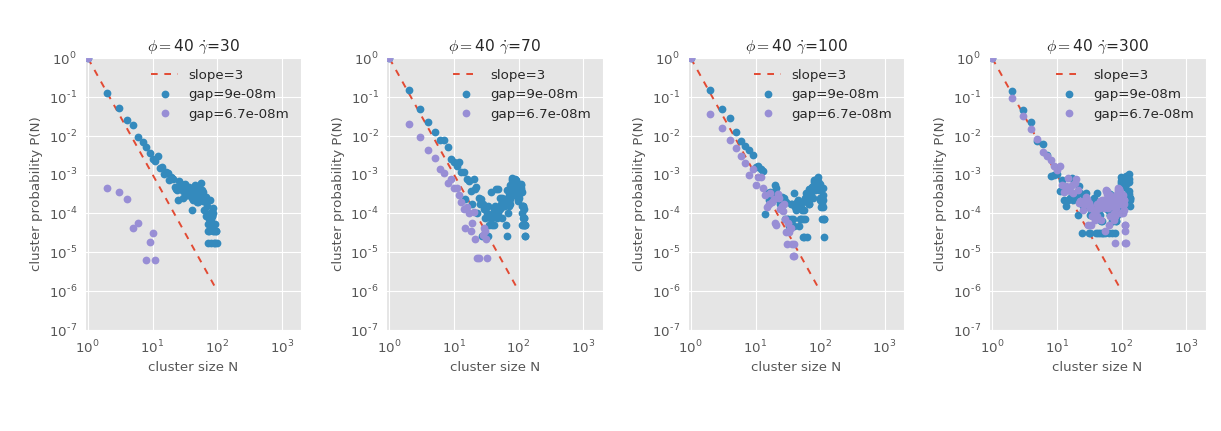

1002 steps available
1
1001 steps available
2
1002 steps available
3
1004 steps available
4
1002 steps available
1
1001 steps available
2
1002 steps available
3
1004 steps available
4


In [5]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f

import seaborn as sns
from susipop.susi.cache import SusiCache as cache
label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)
progress_2 = widgets.IntProgress(min = 0, max = 100, value = 0)

def cluster_size_vs_probability_matplotlib(path_text_input,phis,shearrates,gaps, loglog,Individual_plots,viscosity_range,\
                                           fit_exponential,exponential_range,fitting_method,idx_range,manual_slope, 
                                           manual_offset,marker,fig_size,slope_line=True,normalize=False,highdpi=False):    
    plt.style.use("ggplot")
    if not Individual_plots:
        plt.figure(figsize=[10,5],dpi=300)
    else:
#         matplotlib.rcParams.update({'font.size': 8})
        if highdpi : plt.figure(figsize=[fig_size*len(shearrates),fig_size*len(phis)],dpi=300)
        else: plt.figure(figsize=[fig_size*len(shearrates),fig_size*len(phis)])
        nx_plots = len(phis)
        ny_plots = len(shearrates)
        if slope_line:
            for plot_id in range(1,nx_plots*ny_plots+1):
                plt.subplot(nx_plots,ny_plots,plot_id)
                plt.loglog([10**(val) for val in np.linspace(0,2,10)],[10**(-3*val+0) for val in np.linspace(0,2,10)],"--",label="slope=3")
    for g,gap in enumerate(gaps):
        n_fig = 0
        s_data = np.asarray([])
        ns_data = np.asarray([])
        for p,phi in enumerate(phis):
            for k,shearrate in enumerate(shearrates):
                n_fig += 1
                progress_2.value = int(float(n_fig)*(g+1)/(len(shearrates)*len(phis)*len(gaps))*100)
                if Individual_plots: s_data, ns_data = np.asarray([]), np.asarray([])
                try:
                    if len(path_text_input.strip())== 0:
                        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                    else:
                        path = str(path_text_input)+"/rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))

                    dataset = sp.reader.DataSet(path,particles=True, fluid=False)
                    npart = float(dataset.npart)
                    print len(dataset.tlist), "steps available"

                    cache_file = cache(cachefile=dataset.cachefile)
                    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
                    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
                    idx_visc = np.where((viscosity <= viscosity_range[1]) & (viscosity >= viscosity_range[0]))[0]
#                     print idx_visc
#                     print 
#                     for i,t in enumerate([dataset.tlist[i]  for i in [i ifidx_visc]):
                    for i,t in enumerate([dataset.tlist[i] for i in idx_visc]):
                        progress_1.value = int(float(i)/len([dataset.tlist[i] for i in idx_visc])*100)
                        try:
                            if cache_file.has_data(t,"cluster_size_distribution_gap_"+str(gap)):
                                label_cache.value = "loading data for t="+str(t)
                                s, ns = cache_file.load_data(t,"cluster_size_distribution_gap_"+str(gap))
                                idx = np.where(ns != 0)[0]
                                s_data = np.concatenate([s_data , s[idx]])
                                ns_data = np.concatenate([ns_data , ns[idx]])
                                label1.value = str(s[idx])
                            else:
                                dataset.load_state(t)
                                label_cache.value = "saving data for t="+str(t)
                                s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                                cache_file.save_data(t,{"cluster_size_distribution_gap_"+str(gap):[s, ns]})
                                idx = np.where(ns != 0)[0]
                                s_data = np.concatenate([s_data , s[idx]])
                                ns_data = np.concatenate([ns_data , ns[idx]])
                                label1.value = str(s[idx])
                        except Exception as e:
                            print e 
                            continue
                    
                    try:
                        if Individual_plots:
                            uniq_sizes = np.unique(s_data)
                            ns_data_cumulative = np.zeros_like(uniq_sizes)
                            for i, item in enumerate(uniq_sizes):
                                idx_uniq = np.where(s_data == item)[0]
                                ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                            ns_temp_tot = ns_data_cumulative
                            nx_plots = len(phis)
                            ny_plots = len(shearrates)
                            
                            plt.subplot(nx_plots, ny_plots,n_fig)
                            
                            print (p+1)*(k+1)
                            if loglog:
                                slopestring = ""
                                x_log_unsorted = np.log10(uniq_sizes)
                                y_log_unsorted = np.log10(ns_data_cumulative/float(max(ns_data_cumulative)))
                                y_log = [yi for (xi,yi) in sorted(zip(x_log_unsorted,y_log_unsorted))]
                                x_log = np.sort(x_log_unsorted)
                                #fitting line to powerlaw---------------------------------------------------------------------
                                if fit_exponential:
                                    if fitting_method=="use_idx_range":
                                        n1,n2 = idx_range[0],idx_range[1]
                                        m,b = np.polyfit(x_log[n1:n2], y_log[n1:n2], 1)
#                                         n1_n2_idx = np.where((y_log >= -4) &  (x_log < 2))[0]
                                        
                                    elif fitting_method=="manual":
                                        m,b = float(manual_slope), float(manual_offset)
                                        n1,n2 = idx_range[0],idx_range[1]
                                        print "asdas",m,b
                                    elif fitting_method=="use_exponential_range":
                                        n1_n2_idx = []
                                        for i in range(len(x_log)):
                                            if x_log[i] < 2:
                                                if y_log[i] > exponential_range[0]:
                                                    if y_log[i] < exponential_range[1]:
                                                        n1_n2_idx.append(i)
    #                                                 print i 
                                        print n1_n2_idx
                                        n1_n2_idx = np.asarray(n1_n2_idx)
                                        n2 = max(n1_n2_idx)
                                        n1 = max(min(n1_n2_idx),1)
                                        m,b = np.polyfit(x_log[n1:n2], y_log[n1:n2], 1)
                                    
                                    print n1,n2,m,b
#                                     print x_log[n1:n2], "asdasd d",y_log[n1:n2]
#                                     m,b = np.polyfit(x_log[n1_n2_idx], y_log[n1_n2_idx], 1)
#                                     m,b = np.polyfit(x_log[n1:n2], y_log[n1:n2], 1)
                                    
                                    plt.loglog([10**(val) for val in np.linspace(0,2,10)],[10**(m*val+b) for val in np.linspace(0,2,10)])
                                    slopestring = "\ns="+str(round(m,2))
                                #fitting line to powerlaw ends----------------------------------------------------------
                                if not normalize:
                                    plt.loglog(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),marker,label="gap="+str(gap)+"m"+slopestring)
                                else:
                                    plt.loglog([i/npart for i in uniq_sizes],ns_data_cumulative/float(max(ns_data_cumulative)),marker,label="gap="+str(gap)+"m"+slopestring)
#                                 plt.loglog(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),label="gap="+str(gap))

                            else:
                                plt.plot(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),marker,label="gap="+str(gap))
#                                 plt.plot(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),label="gap="+str(gap))
#                             if fit_exponential:
                                
                                
                            plt.xlabel("cluster size N")
                            plt.ylabel("cluster probability P(N)")
                            plt.xticks(fontsize=12)
                            plt.yticks(fontsize=12)
                            if not normalize:
                                plt.xlim([0.9,2e3])
                                plt.ylim([1e-7,1.1])
                            else:
                                plt.xlim([0,1.1])
                                plt.ylim([1e-7,1.1])
                            plt.legend(loc="best",fontsize=12)
#                             plt.title("$\phi=$"+str(phi)+" $\dot{\gamma}$="+str(shearrate)+" rel.viscosity: "+str(viscosity_range),fontsize=10)
                            plt.title("$\phi=$"+str(phi)+" $\dot{\gamma}$="+str(shearrate),fontsize=14)

                    except Exception as e:
                        continue
                        
                except Exception as e:
                    print e

        if not Individual_plots:
            uniq_sizes = np.unique(s_data)
            ns_data_cumulative = np.zeros_like(uniq_sizes)
            for i, item in enumerate(uniq_sizes):
                idx_uniq = np.where(s_data == item)[0]
                ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            x,y = uniq_sizes, ns_data_cumulative
            
            if loglog:
                plt.loglog(x,  y/float(max(y)),marker)
                plt.loglog(x,  y/float(max(y)),label="gap="+str(gap)+"m")
            else:
                plt.plot(x,  y/float(max(y)),marker)
                plt.plot(x,  y/float(max(y)),label="gap="+str(gap)+"m")
            plt.xlabel("cluster size N")
            plt.ylabel("cluster probability ")
            plt.legend(loc="best")
    plt.tight_layout()
    
    
widget_cluster_size_vs_probability_matplotlib = interactive(cluster_size_vs_probability_matplotlib, \
    path_text_input = widgets.Text(value="./"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58],value=[55]), \
    shearrates= widgets.SelectMultiple(options=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000],value=[10,15,20,70]),\
    gaps = widgets.SelectMultiple(options=[9e-8,6.7e-8,4e-8,1e-8], value = [6.7e-8]),\
    loglog = widgets.RadioButtons(options=[True,False],value = True),\
    Individual_plots = widgets.RadioButtons(options=[True,False],value = True),\
    viscosity_range = widgets.IntRangeSlider(min=1,max=1e6,value=[1,1000000]),\
    fit_exponential = widgets.ToggleButtons(options=[True,False],value = True),\
    exponential_range = widgets.FloatRangeSlider(description = "probability range of exponential regime for fitting",value = [-4,-1], min= -8, max = 0),\
    idx_range =  widgets.IntRangeSlider(value = [1,10], min = 0, max= 30),\
    fitting_method = widgets.ToggleButtons(options=["use_exponential_range","use_idx_range","manual"],
                                           value = "use_exponential_range"),
    manual_slope = widgets.FloatText(value=-3,min=-100,max=1e6),\
    manual_offset = widgets.FloatText(value=-1,min=-100,max=1e6),\
    marker = widgets.Text(value="o"), 
    fig_size = widgets.FloatText(value="3",min=0),
    __manual = True)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_cluster_size_vs_probability_matplotlib.children[0])
display(widgets.HBox(widget_cluster_size_vs_probability_matplotlib.children[1:4]))
display(widgets.HBox(widget_cluster_size_vs_probability_matplotlib.children[4:-11]))
display(widgets.HBox(widget_cluster_size_vs_probability_matplotlib.children[-11:-7]))
display(widgets.HBox(widget_cluster_size_vs_probability_matplotlib.children[-7:-4]))
display(widgets.HBox(widget_cluster_size_vs_probability_matplotlib.children[-4:]))
display(label1)
display(progress_2)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

# gaps vs shear stress 

<IPython.core.display.Javascript object>


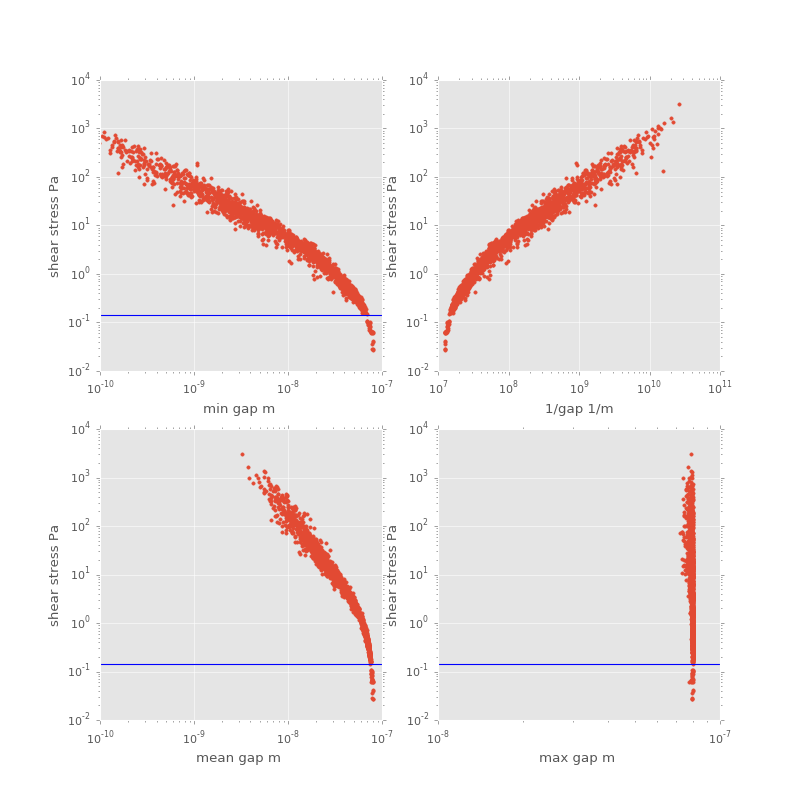

<IPython.core.display.Javascript object>


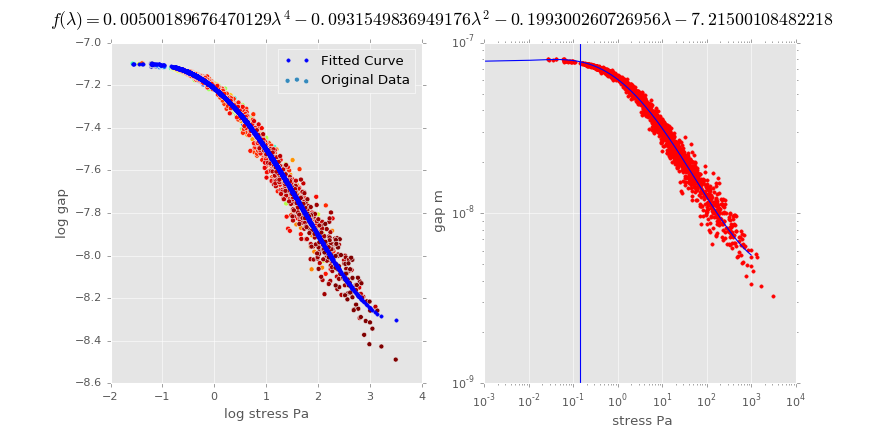

[17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 51, 51, 51, 51, 51, 51, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53,

In [4]:
import matplotlib.cm as cm

progress_g_ss = widgets.Label(value = "")
display(progress_g_ss)
progress_bar = widgets.IntProgress(min=0,max=100,value=0)
display(progress_bar)
def get_gap_shear_stress(path_add,phi,yd,t):
#     path_add = "larger_system_size/from_cartesius/F_CL_2e-10/"
#     path_add = ""
    path = path_add +"rhor1_phi"+str(phi)+"_yd"+str(yd)+"/"
    dataset = reader.DataSet(path, particles=True, fluid=False)
    viscosity_file = pd.read_csv(path+"result/nu_t.dat")
    viscosity = viscosity_file[viscosity_file.columns[2]]
    dataset.load_state(dataset.tlist[t])
    shear_stress = viscosity[t-1]*yd
    r = dataset.particles.r
    radius = dataset.particles.radius
    def gap(i,j):
        return np.linalg.norm(r[i]-r[j])-radius[i] - radius[j]
    gaps = []
    for i in range(dataset.npart):
        for j in range(dataset.npart):
            if j > i:
                gap_ij = gap(i,j)
                if gap_ij<8e-8:
                    gaps.append(gap_ij)
#     return np.mean(gaps), shear_stress
    return np.min(gaps),np.mean(gaps),np.max(gaps), shear_stress


def gap_analysis(path_add,phis, shearrates,time_step):
    global gaps, ss, mean_gap, max_gap, col,min_gap    
    gaps,ss = [],[]
    mean_gap, max_gap = [], []
#     colors = cm.rainbow(np.linspace(0, 1, len(shearrates)*len(phis)))
    col = []
    col_ = 0
    for p in phis:
#     for p in [40,45,50,54,55,56]:
#         for y in [float(i) for i in range(10,100,5)]:
        for y in shearrates:
            col_ += 1
            for i in range(50,1000,time_step):
                try:
                    min_g,mean_g,max_g,s = get_gap_shear_stress(path_add,p,y,i)
                    progress_g_ss.value = str(p)+", "+ str(y) + " completed="+str(float(i)/1000.0*100)+"%"
                    progress_bar.value = int(float(i)/1000.0*100)
                    gaps.append(min_g)
                    mean_gap.append(mean_g)
                    max_gap.append(max_g)
                    ss.append(s)
                    col.append(col_)
                except Exception as e:
#                     print e
                    continue
    min_gap = gaps
    return ss,min_gap,mean_gap,max_gap,col


def plot_gaps_vs_shearstress(path_add,phis, shearrates,time_step,analyze):
    import matplotlib.pyplot as plt
    if analyze:
        ss,min_gap,mean_gap,max_gap,col = gap_analysis(path_add,phis, shearrates,time_step)
    gaps=min_gap
    plt.figure(figsize=[10,10])
    plt.style.use("ggplot")
    plt.subplot(221)
    plt.loglog(gaps, ss, '.')
    plt.axhline(0.14)
    plt.xlabel("min gap m ")
    plt.ylabel("shear stress Pa")
    plt.xlim([1e-10, 1e-7])
    plt.subplot(222)
    plt.loglog([1.0/i for i in gaps], ss, '.')
    plt.xlabel("1/gap 1/m")
    plt.ylabel("shear stress Pa")
    # plt.xlim([1e-10, 1e-7])
    plt.subplot(223)
    plt.loglog(mean_gap, ss, '.')
    plt.axhline(0.14)
    plt.xlabel("mean gap m ")
    plt.ylabel("shear stress Pa")
    plt.xlim([1e-10, 1e-7])
    plt.subplot(224)
    plt.loglog(max_gap, ss, '.')
    plt.axhline(0.14)
    plt.xlabel("max gap m ")
    plt.ylabel("shear stress Pa")
    # plt.xlim([1e-10, 1e-7])
    # -*- coding: utf-8 -*-

    import matplotlib.pyplot as plt
    from scipy.optimize import curve_fit
    import numpy as np
    import sympy as sym

    """
    Generate some data, let's imagine that you already have this. 
    """
    # y = [1.0/(i) for i in gaps]
    # y = gaps
    y = [np.log10(i) for i in mean_gap]
    # y = [i for i in gaps]
    # x = ss
    x = [np.log10(i) for i in ss]

    """
    Plot your data
    """
    plt.figure(figsize=[12,6])
    plt.subplot(121)
#     plt.plot(x, y, 'ro',label="Original Data")
    
    plt.scatter(x,y,c=col,label="Original Data")
    print col
#     plt.gray()
    """
    brutal force to avoid errors
    """    
    x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
    y = np.array(y, dtype=float) #so the curve_fit can work

    """
    create a function to fit with your data. a, b, c and d are the coefficients
    that curve_fit will calculate for you. 
    In this part you need to guess and/or use mathematical knowledge to find
    a function that resembles your data
    """
    def func(x, a, b, c, d):
        return a*x**4 + b*x**2 +c*x + d

    # def func(x, a, b,c):
    #     return a*2.718281828459045**(x*-b)+c
    """
    make the curve_fit
    """
    popt, pcov = curve_fit(func, x, y)

    """
    The result is:
    popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
    so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
    """
    print "a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3])
    # print "a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2])
    """
    Use sympy to generate the latex sintax of the function
    """
    xs = sym.Symbol('\lambda')    
    tex = sym.latex(func(xs,*popt)).replace('$', '')
    plt.suptitle(r'$f(\lambda)= %s$' %(tex),fontsize=16)

    """
    Print the coefficients and plot the funcion.
    """

    plt.plot(x, func(x, *popt),'b.', label="Fitted Curve") #same as line above \/
    #plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

    plt.legend(loc='best')
    plt.xlabel("log stress Pa")
    plt.ylabel("log gap")
    plt.show()

    def predict_gap(shear_stress):
        i = shear_stress
        log_gap = popt[0]*np.log10(i)**4 +popt[1]*np.log10(i)**2 +popt[2]*np.log10(i) +popt[3]
        return 10**(log_gap)

    # plt.figure()
    plt.subplot(122)
    # plt.plot([np.log(i) for i in ss],[np.log(i) for i in gaps],'r.')
    # plt.loglog(ss,gaps,'r.')
    plt.loglog(ss,mean_gap,'r.')
    fit_gap = [ predict_gap(i) for i in np.linspace(1e-2,1e3,100000)]
    # log_ss = [np.log(i) for i in ss]
    # plt.plot(log_ss,fit,'b.')
    plt.plot(np.linspace(1e-3,1e3,100000),fit_gap,'b')
    plt.xlabel(" stress Pa")
    plt.ylabel(" gap m")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.axvline(0.14)
    
widget_plot_gaps_vs_shearstress = interactive(plot_gaps_vs_shearstress, \
    path_add = widgets.Text(value="larger_system_size/from_cartesius/F_CL_2e-10/",description="path"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58]), \
    shearrates= widgets.SelectMultiple(options=[1.0,10.0,11.0,11.5,12.0,12.5,13.0,14.0,15.0,16.0,18,20.0,30.0,\
                                                50.0,70.0,100.0,200.0,300.0,1000.0]),\
    time_step = widgets.IntText(value=10),\
    analyze = widgets.ToggleButtons(options=[True,False], value= True),\
    __manual = True)
display(widgets.HBox(widget_plot_gaps_vs_shearstress.children[:-3]))
display(widgets.HBox(widget_plot_gaps_vs_shearstress.children[-3:]))

![title](https://dl.dropboxusercontent.com/s/c8losb17dqyx7q0/download%20%2833%29.png)

From the above frictional contacs vs shear stress plot, it can be observed that the minimum shear stress for friction is about 0.14 Pa. Using this information and applying it to the shear stress vs mean gap  plot before, we can see that the mean gap is 8e-8 m for the formation of frictional contacts with shear stress. 

<IPython.core.display.Javascript object>


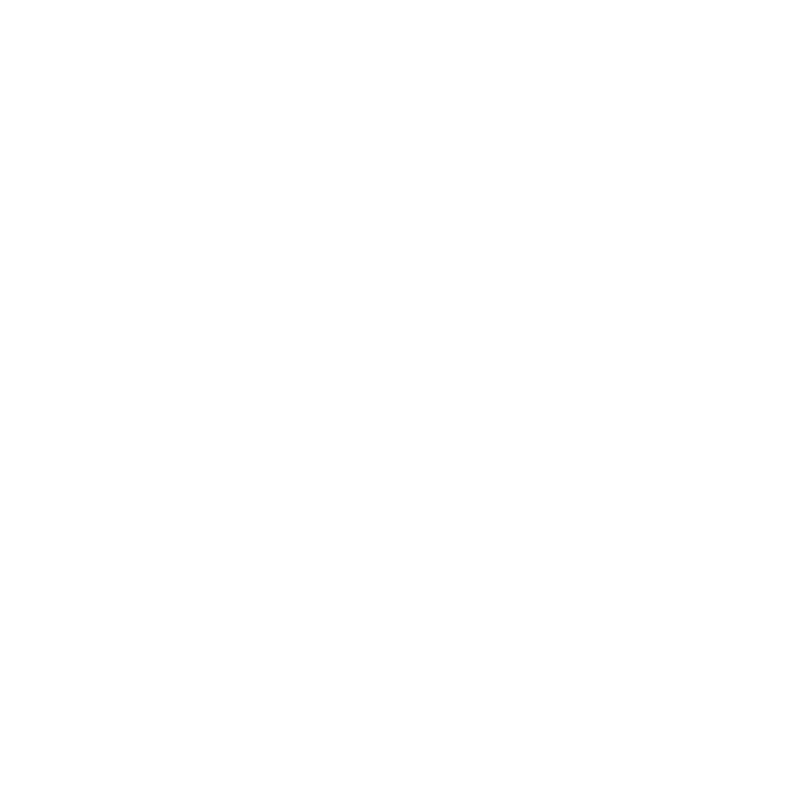

NameError: name 'gaps' is not defined

In [3]:

plt.figure(figsize=[10,10])
plt.style.use("classic")
plt.subplot(221)
plt.loglog(gaps, ss, '.')
plt.axhline(0.14)
plt.xlabel("min gap m ")
plt.ylabel("shear stress Pa")
plt.xlim([1e-10, 1e-7])
plt.subplot(222)
plt.loglog([1.0/i for i in gaps], ss, '.')
plt.xlabel("1/gap 1/m")
plt.ylabel("shear stress Pa")
# plt.xlim([1e-10, 1e-7])
plt.subplot(223)
plt.loglog(mean_gap, ss, '.')
plt.axhline(0.14)
plt.xlabel("mean gap m ")
plt.ylabel("shear stress Pa")
plt.xlim([1e-10, 1e-7])
plt.subplot(224)
plt.loglog(max_gap, ss, '.')
plt.axhline(0.14)
plt.xlabel("max gap m ")
plt.ylabel("shear stress Pa")
# plt.xlim([1e-10, 1e-7])
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import sympy as sym

"""
Generate some data, let's imagine that you already have this. 
"""
# y = [1.0/(i) for i in gaps]
# y = gaps
y = [np.log10(i) for i in mean_gap]
# y = [i for i in gaps]
# x = ss
x = [np.log10(i) for i in ss]

"""
Plot your data
"""
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.plot(x, y, 'ro',label="Original Data")

"""
brutal force to avoid errors
"""    
x = np.array(x, dtype=float) #transform your data in a numpy array of floats 
y = np.array(y, dtype=float) #so the curve_fit can work

"""
create a function to fit with your data. a, b, c and d are the coefficients
that curve_fit will calculate for you. 
In this part you need to guess and/or use mathematical knowledge to find
a function that resembles your data
"""
def func(x, a, b, c, d):
    return a*x**4 + b*x**2 +c*x + d

# def func(x, a, b,c):
#     return a*2.718281828459045**(x*-b)+c
"""
make the curve_fit
"""
popt, pcov = curve_fit(func, x, y)

"""
The result is:
popt[0] = a , popt[1] = b, popt[2] = c and popt[3] = d of the function,
so f(x) = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3].
"""
print "a = %s , b = %s, c = %s, d = %s" % (popt[0], popt[1], popt[2], popt[3])
# print "a = %s , b = %s, c = %s" % (popt[0], popt[1], popt[2])
"""
Use sympy to generate the latex sintax of the function
"""
xs = sym.Symbol('\lambda')    
tex = sym.latex(func(xs,*popt)).replace('$', '')
plt.suptitle(r'$f(\lambda)= %s$' %(tex),fontsize=16)

"""
Print the coefficients and plot the funcion.
"""

plt.plot(x, func(x, *popt),'b.', label="Fitted Curve") #same as line above \/
#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='best')
plt.xlabel("log stress Pa")
plt.ylabel("log gap")
plt.show()

def predict_gap(shear_stress):
    i = shear_stress
    log_gap = popt[0]*np.log10(i)**4 +popt[1]*np.log10(i)**2 +popt[2]*np.log10(i) +popt[3]
    return 10**(log_gap)

# plt.figure()
plt.subplot(122)
# plt.plot([np.log(i) for i in ss],[np.log(i) for i in gaps],'r.')
# plt.loglog(ss,gaps,'r.')
plt.loglog(ss,mean_gap,'r.')
fit_gap = [ predict_gap(i) for i in np.linspace(1e-2,1e3,100000)]
# log_ss = [np.log(i) for i in ss]
# plt.plot(log_ss,fit,'b.')
plt.plot(np.linspace(1e-3,1e3,100000),fit_gap,'b.')
plt.xlabel(" stress Pa")
plt.ylabel(" gap m")
plt.axvline(0.14)

# Cluster Analysis with gap as a function of shear stress

In [505]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
import seaborn as sns
from susipop.susi.cache import SusiCache as cache

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)
progress_2 = widgets.IntProgress(min = 0, max = 100, value = 0)

a = 0.00868924612  
b = -0.106230138681
c = -0.198477972798
d = -7.21380690351

def predict_gap(shear_stress):
    if shear_stress > 0.14:
        i = shear_stress
        log_gap = a*np.log10(i)**4 +b*np.log10(i)**2 +c*np.log10(i) +d
        return 10**(log_gap)
    else:
        return 1e-10

def cluster_size_vs_probability_dynamic_gap(path_text_input,phis,shearrates, loglog,Individual_plots,viscosity_range,\
                                            normalize=True):    
    plt.style.use("ggplot")
    if not Individual_plots:
        plt.figure(figsize=[6,3],dpi=300)
    else:
#         matplotlib.rcParams.update({'font.size': 8})
        plt.figure(figsize=[5*len(shearrates),5*len(phis)])

    n_fig = 0
    s_data = np.asarray([])
    ns_data = np.asarray([])
    for p,phi in enumerate(phis):
        for k,shearrate in enumerate(shearrates):
            n_fig += 1
            progress_2.value = int(float(n_fig)/(len(shearrates)*len(phis))*100)
            if Individual_plots: s_data, ns_data = np.asarray([]), np.asarray([])
            try:
                if len(path_text_input.strip())== 0:
                    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                else:
                    path = str(path_text_input)+"/rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                dataset = sp.reader.DataSet(path,particles=True, fluid=False)
                print len(dataset.tlist), "steps available"
                npart = dataset.npart
                cache_file = cache(cachefile=dataset.cachefile)
                viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
                viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
                viscosity_non_relative = np.array(viscosity_file[viscosity_file.columns[2]][1:])
                idx_visc = np.where((viscosity <= viscosity_range[1]) & (viscosity >= viscosity_range[0]))[0]
                for i,t in enumerate([dataset.tlist[j] for j in idx_visc]):
                    progress_1.value = int(float(i)/len(idx_visc)*100)
                    try:
                        if cache_file.has_data(t,"cluster_size_distribution_dynamic_gap"):
                            label_cache.value =  "loading data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                            s, ns = cache_file.load_data(t,"cluster_size_distribution_dynamic_gap")
                            idx = np.where(ns != 0)[0]
                            s_data = np.concatenate([s_data , s[idx]])
                            ns_data = np.concatenate([ns_data , ns[idx]])
                            label1.value = str(s[idx])
                        else:
                            label_cache.value = "saving data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                            dataset.load_state(t)
                            shear_stress = viscosity_non_relative[idx_visc[i]]*shearrate

                            gap = predict_gap(shear_stress)
                            print shear_stress, gap, i
                            s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                            cache_file.save_data(t,{"cluster_size_distribution_dynamic_gap":[s, ns]})
                            idx = np.where(ns != 0)[0]
                            s_data = np.concatenate([s_data , s[idx]])
                            ns_data = np.concatenate([ns_data , ns[idx]])
                            label1.value = str(s[idx])
                    except Exception as e:
                            print e 
                            continue

                try:
                    if Individual_plots:
                        uniq_sizes = np.unique(s_data)
                        ns_data_cumulative = np.zeros_like(uniq_sizes)
                        for i, item in enumerate(uniq_sizes):
                            idx_uniq = np.where(s_data == item)[0]
                            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                        ns_temp_tot = ns_data_cumulative
                        nx_plots = len(phis)
                        ny_plots = len(shearrates)

                        plt.subplot(nx_plots, ny_plots,n_fig)
                        print (p+1)*(k+1)
                        if loglog:
                            if not normalize: 
                                plt.loglog(uniq_sizes,ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                            else:
                                plt.loglog(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                        else:
                            if not normalize:
                                plt.plot(uniq_sizes,ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                            else:
                                plt.plot(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                        
                        #plotting a vertical line at 60% cluster percolation
                        if not normalize: 
                            plt.axvline(x=0.6*npart,label="60% percolation")
                        else:
                            plt.axvline(x=0.6,label="60% percolation")
                        plt.xlabel("cluster size N")
                        plt.ylabel("cluster probability ")
                        if not normalize:
                            plt.xlim([1,2e3])
                        else: 
                            plt.xlim([0,1])
                        plt.ylim([1e-7,1])
                        plt.legend(loc="best")
                        plt.title("phi="+str(phi)+" yd="+str(shearrate)+" rel.visc: "+str(viscosity_range),fontsize=10)
                    else:
                        mpl.rcParams.update({'font.size': 12})
                        
                        uniq_sizes = np.unique(s_data)
                        ns_data_cumulative = np.zeros_like(uniq_sizes)
                        for i, item in enumerate(uniq_sizes):
                            idx_uniq = np.where(s_data == item)[0]
                            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                        ns_temp_tot = ns_data_cumulative
                        nx_plots = len(phis)
                        ny_plots = len(shearrates)

                        print (p+1)*(k+1)
                        if loglog:
                            if not normalize:
                                plt.loglog(uniq_sizes,ns_data_cumulative/float(sum(ns_data_cumulative)),'k.')
                            else:
                                plt.loglog(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'k.',markersize=5)
                        else:
                            plt.plot(uniq_sizes,ns_data_cumulative,'.')
                        plt.xlabel("cluster size N")
                        plt.ylabel("cluster probability ")
                        plt.xticks(fontsize=12)
                        plt.yticks(fontsize=12)
#                         plt.xlim([1,2e3])
                        plt.ylim([1e-7,5])
                        plt.legend(loc="best")
#                         plt.title("phi="+str(phi)+" yd="+str(shearrate)+" rel.visc: "+str(viscosity_range),fontsize=10)
                except Exception as e:
                    continue

            except Exception as e:
                print e

    if not Individual_plots:
        uniq_sizes = np.unique(s_data)
        ns_data_cumulative = np.zeros_like(uniq_sizes)
        ns_data_sd = np.zeros_like(uniq_sizes)
        for i, item in enumerate(uniq_sizes):
            idx_uniq = np.where(s_data == item)[0]
            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            ns_data_sd[i] = np.std(ns_data[idx_uniq])
        x,y = uniq_sizes, ns_data_cumulative

        if loglog:
            plt.plot(x/float(npart),  y/float(sum(y)))
        else:
            plt.plot(x,  y/float(sum(y)),'o')
            plt.plot(x,  y/float(sum(y)),linewidth=0.1)
        plt.xscale("log")
        plt.yscale("log")
        
        if normalize: 
            plt.xlabel("normalized cluster size N")
        else:
            plt.xlabel("cluster size N")
            
        plt.ylabel("cluster probability ")
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        
        mpl.rcParams.update({'font.size': 14})
        plt.legend(loc="best")
        plt.tight_layout()
    
    
widget_cluster_size_vs_probability_dynamic_gap = interactive(cluster_size_vs_probability_dynamic_gap, \
    path_text_input = widgets.Text(value="./"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58], value = [40,45,50,54,55,56]), \
    shearrates= widgets.SelectMultiple(options=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], 
                                       value=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100]),\
    loglog = widgets.RadioButtons(options=[True,False],value = True),\
    Individual_plots = widgets.RadioButtons(options=[True,False],value = False),\
    viscosity_range = widgets.IntRangeSlider(min=1,max=1e6,value=[1,100000]),\
    __manual = True)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_cluster_size_vs_probability_dynamic_gap.children[0])
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[1:4]))
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[4:]))
display(label1)
display(progress_2)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

# Heatmap of the bumps and power law regime

<IPython.core.display.Javascript object>


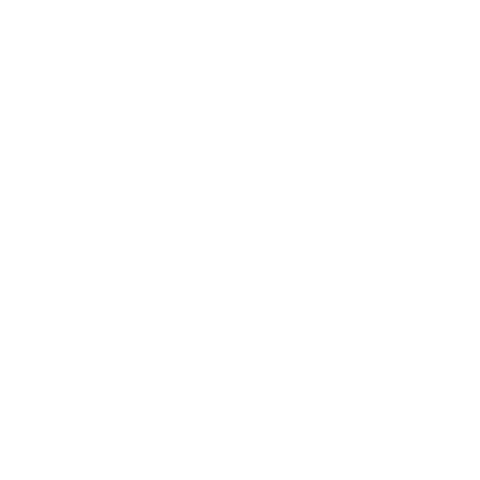

694 steps available
[[56, 10, 15.026283139819808]]


<IPython.core.display.Javascript object>


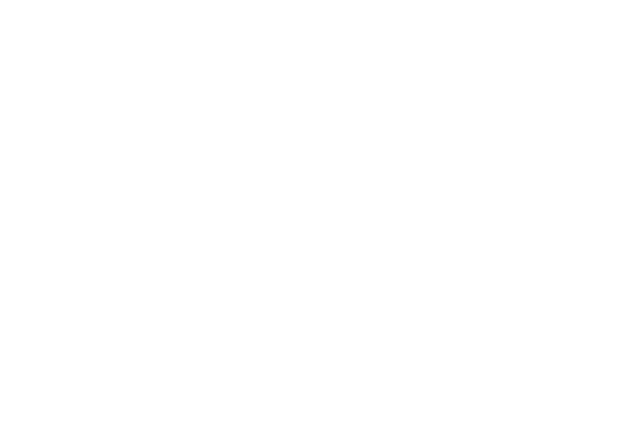

<IPython.core.display.Javascript object>


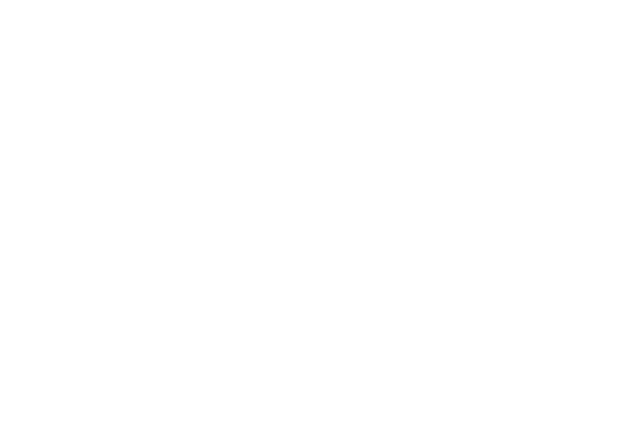

NameError: global name 'seed' is not defined

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp
from scipy.integrate import simps,trapz
from multiprocessing import Pool

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
import seaborn as sns
from susipop.susi.cache import SusiCache as cache

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)
progress_2 = widgets.IntProgress(min = 0, max = 100, value = 0)


a = 0.00868924612  
b = -0.106230138681
c = -0.198477972798
d = -7.21380690351

def predict_gap(shear_stress):
    if shear_stress > 0.14:
        i = shear_stress
        log_gap = a*np.log10(i)**4 +b*np.log10(i)**2 +c*np.log10(i) +d
        return 10**(log_gap)
    else:
        return 1e-10

from scipy.interpolate import griddata
import numpy.ma as ma
# make up some randomly distributed data
def plot_heatmap(x,y,z,n):
    plt.figure()
    seed(1234)
    npts = 200
    # define grid.
    xi = np.linspace(min(x),max(x),n)
    yi = np.linspace(min(y),max(y),n)
    print xi;print yi
    # grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
    zi = np.nan_to_num(zi)
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(x,y,marker='o',c='b',s=5)
#     plt.xlim(-2,2)
#     plt.ylim(-2,2)
#     plt.yscale("log")
    plt.title('griddata test (%d points)' % npts)
    plt.show()

def cluster_size_vs_probability_dynamic_gap(path_text_input,phis,shearrates, viscosity_range, heatmap_regime,analyze=True,heatmap_resolution=10,normalize=True):  
    if analyze:                                          
        plt.style.use("ggplot")
        plt.figure(figsize=[6,6])
        n_fig = 0
        s_data = np.asarray([])
        ns_data = np.asarray([])
        phi_array = []
        yd_array = []
        area_array = []
        for p,phi in enumerate(phis):
            for k,shearrate in enumerate(shearrates):
                n_fig += 1
                progress_2.value = int(float(n_fig)/(len(shearrates)*len(phis))*100)
                s_data, ns_data = np.asarray([]), np.asarray([])
                try:
                    if len(path_text_input.strip())== 0:
                        path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                    else:
                        path = str(path_text_input)+"/rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))


                    dataset = sp.reader.DataSet(path,particles=True, fluid=False)
                    print len(dataset.tlist), "steps available"
                    npart = dataset.npart
                    cache_file = cache(cachefile=dataset.cachefile)
                    viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
                    viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
                    viscosity_non_relative = np.array(viscosity_file[viscosity_file.columns[2]][1:])

                    idx_visc = np.where((viscosity <= viscosity_range[1]) & (viscosity >= viscosity_range[0]))[0]
    #                     print idx_visc
    #                     print 
    #                     for i,t in enumerate([dataset.tlist[i]  for i in [i ifidx_visc]):
    #                 print idx_visc
                    for i,t in enumerate([dataset.tlist[j] for j in idx_visc]):
                        progress_1.value = int(float(i)/len(idx_visc)*100)
                        try:
                            if cache_file.has_data(t,"cluster_size_distribution_dynamic_gap"):
                                label_cache.value =  "loading data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                                s, ns = cache_file.load_data(t,"cluster_size_distribution_dynamic_gap")
                                idx = np.where(ns != 0)[0]
                                s_data = np.concatenate([s_data , s[idx]])
                                ns_data = np.concatenate([ns_data , ns[idx]])
                                label1.value = str(s[idx])
                            else:
                                label_cache.value = "saving data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                                dataset.load_state(t)
                                shear_stress = viscosity_non_relative[idx_visc[i]]*shearrate

                                gap = predict_gap(shear_stress)
    #                             print shear_stress, gap, i
                                s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                                cache_file.save_data(t,{"cluster_size_distribution_dynamic_gap":[s, ns]})
                                idx = np.where(ns != 0)[0]
                                s_data = np.concatenate([s_data , s[idx]])
                                ns_data = np.concatenate([ns_data , ns[idx]])
                                label1.value = str(s[idx])
                        except Exception as e:
                                print e 
                                continue

                    try:
                        uniq_sizes = np.unique(s_data)
                        ns_data_cumulative = np.zeros_like(uniq_sizes)
                        for i, item in enumerate(uniq_sizes):
                            idx_uniq = np.where(s_data == item)[0]
                            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                        ns_temp_tot = ns_data_cumulative
                        if heatmap_regime == "all":
                            x_heat = [np.log10(val) for val in uniq_sizes/float(npart)] 
                            y_heat = [np.log10(val) for val in ns_data_cumulative/float(max(ns_data_cumulative))] 
                        elif heatmap_regime == "powerlaw":
                            idx = np.where(uniq_sizes < 10**2)[0]
                            x_heat = [np.log10(val) for val in uniq_sizes[idx]/float(npart)] 
                            y_heat = [np.log10(val) for val in ns_data_cumulative[idx]/float(max(ns_data_cumulative))]
                        elif heatmap_regime == "bump":
                            idx = np.where(uniq_sizes < 10**2)[0]
                            x_heat = [np.log10(val) for val in uniq_sizes[idx]/float(npart)] 
                            y_heat = [np.log10(val) for val in ns_data_cumulative[idx]/float(max(ns_data_cumulative))]
                        area_under = trapz(x_heat,y_heat)
                        area_array.append(area_under)
                        phi_array.append(phi)
                        yd_array.append(shearrate)

                        plt.subplot(nx_plots, ny_plots,n_fig)
                        print (p+1)*(k+1)
                        if loglog:
                            plt.loglog(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),'o')
    #                                 plt.loglog(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),label="gap="+str(gap))
                        else:
                            plt.plot(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),'o')
    # #                                 plt.plot(uniq_sizes,ns_data_cumulative/float(max(ns_data_cumulative)),label="gap="+str(gap))
                        plt.xlabel("cluster size N")
                        plt.ylabel("cluster probability ")
                        plt.xlim([1,2e3])
                        plt.ylim([1e-7,1])
                        plt.legend(loc="best")
                        plt.title("phi="+str(phi)+" yd="+str(shearrate)+" rel.visc: "+str(viscosity_range),fontsize=10)
                    except Exception as e:
                        continue

                except Exception as e:
                    print e
        print  [[phi_array[i] , yd_array[i] , area_array[i]] for i in range(len(area_array))]
    
    plt.figure()
    x_list = np.asarray(phi_array)
    y_list = np.asarray(yd_array)
    z_list = np.asarray(area_array)
    plot_heatmap(x_list,y_list,z_list,heatmap_resolution)
        
widget_cluster_size_vs_probability_dynamic_gap = interactive(cluster_size_vs_probability_dynamic_gap, \
    path_text_input = widgets.Text(value="larger_system_size/from_cartesius/F_CL_2e-10/"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58]), \
    shearrates= widgets.SelectMultiple(options=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000]),\
    loglog = widgets.RadioButtons(options=[True,False],value = True),\
    Individual_plots = widgets.RadioButtons(options=[True,False],value = True),\
    viscosity_range = widgets.IntRangeSlider(min=1,max=1e6,value=[1,10000]),\
    heatmap_regime = widgets.ToggleButtons(options=["all","bump","powerlaw"], value= "powerlaw"),
    __manual = True)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_cluster_size_vs_probability_dynamic_gap.children[0])
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[1:4]))
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[4:]))
display(label1)
display(progress_2)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

<IPython.core.display.Javascript object>


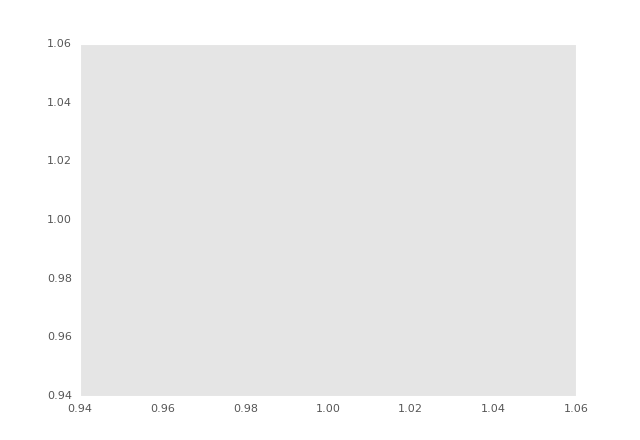

In [51]:
from numpy.random import uniform, seed
from matplotlib.mlab import griddata
import matplotlib.pyplot as plt
import numpy as np
# make up data.
#npts = int(raw_input('enter # of random points to plot:'))
# def plot_data_xyz(x,y,z,n):
#     seed(0)
#     plt.figure()
#     npts = 200
# #     x = np.linspace(-2, 2, npts)
# #     y = uniform(-2, 2, npts)
# #     z = x*np.exp(-x**2 - y**2)
#     # define grid.
#     xi = np.linspace(min(x), max(x), n)
#     yi = np.linspace(min(y), max(y), n)
#     # grid the data.
#     zi = griddata(x, y, z, xi, yi, interp='linear')
#     # contour the gridded data, plotting dots at the nonuniform data points.
#     CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
#                       vmax=abs(zi).max(), vmin=-abs(zi).max())
#     plt.colorbar()  # draw colorbar
#     # plot data points.
#     plt.show()
plt.figure()
def plot_data_xyz2(x,y,z):

    x=np.linspace(1,10,1)
    y=np.linspace(1,10,1)
    z=np.linspace(1,10,1)

    ## Equivalently, we could do that all in one line with:
    # x,y,z = np.genfromtxt('eye_.txt', delimiter=',', usecols=(0,1,2))

    x=np.unique(x)
    y=np.unique(y)
    X,Y = np.meshgrid(x,y)

    Z=z.reshape(len(y),len(x))

    plt.pcolormesh(X,Y,Z)

    plt.show()
plot_data_xyz2(range(0,10),range(10,20),range(30,40))

<IPython.core.display.Javascript object>


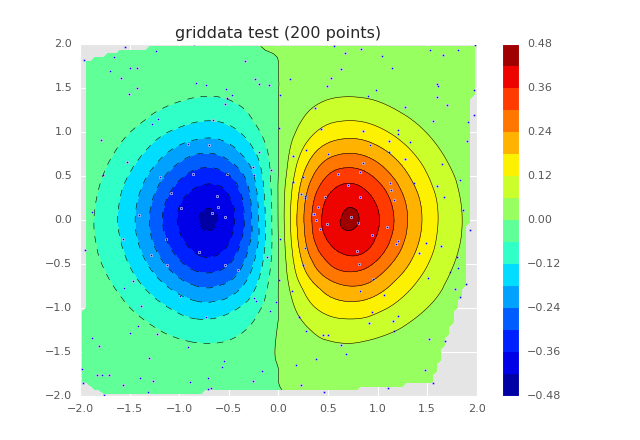

In [88]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
# make up some randomly distributed data
plt.figure()
seed(1234)
npts = 200
x = uniform(-2,2,npts)
y = uniform(-2,2,npts)
z = x*np.exp(-x**2-y**2)
# define grid.
xi = np.linspace(-2.1,2.1,100)
yi = np.linspace(-2.1,2.1,100)
# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()

<IPython.core.display.Javascript object>


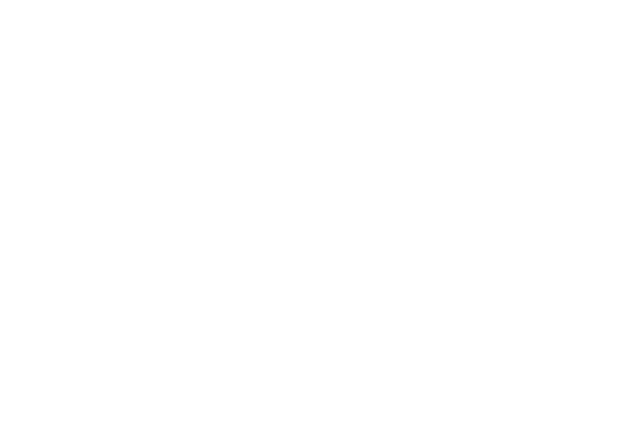

[ 5 11 20]


<IPython.core.display.Javascript object>


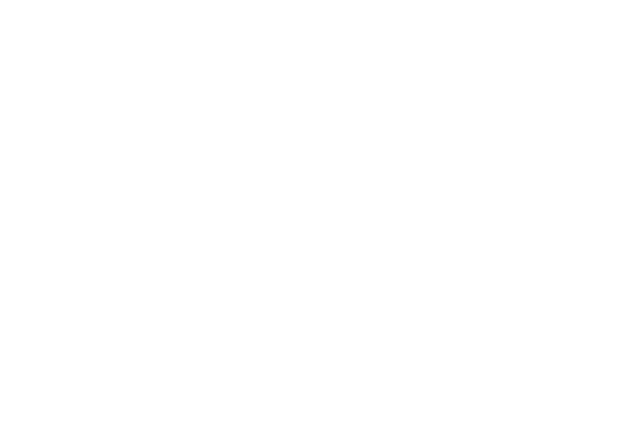

NameError: global name 'seed' is not defined

In [3]:
data = [[40, 10, 0.0], [40, 50, 5.0534654283568905], [40, 100, 5.7567571323714688], [40, 200, 6.0737163362504356], [40, 300, 5.9973410617314391], [40, 1000, 5.5534070625412575], [45, 10, 0.0], [45, 50, 6.0825230909418817], [45, 100, 5.9636468553530069], [45, 200, 6.6787855070422744], [45, 300, 7.4970238815768759], [45, 1000, 5.6629829404873595], [50, 1, 7.5386201933720276], [50, 10, 5.6649720060742847], [50, 20, 7.6000255247374531], [50, 30, 6.6225739672543495], [50, 50, 6.864193433541649], [50, 70, 7.008081953119893], [50, 100, 5.4962856504154418], [50, 300, 7.3205657246693994], [50, 1000, 6.187194347861908], [54, 1, 0.0], [54, 10, 7.7059069684168051], [54, 15, 9.2963895299908756], [54, 20, 8.2801975611761485], [54, 30, 8.6437814441696492], [54, 50, 7.4102886406911228], [54, 70, 6.7598833183949552], [54, 100, 6.6986887407576035], [54, 300, 6.6529691099656958], [55, 1, 0.0], [55, 10, 7.9416823706458333], [55, 15, 8.0066496382976649], [55, 20, 7.3725097861827447], [55, 30, 6.4880092839576431], [55, 50, 6.3871613815003663], [55, 70, 6.3407953192962605], [56, 1, 0.0], [56, 10, 8.0932933744946922], [56, 11, 8.3589945614744678], [56, 11.5, 8.1661756471298439], [56, 12, 8.3499955007592312], [56, 12.5, 8.4393795495401438], [56, 13, 8.680105312720757], [56, 14, 7.5696660638336786], [56, 15, 7.3141392541587154], [56, 16, 7.2577224302298973], [56, 18, 7.1826451724471827], [56, 20, 7.0275593007743478], [56, 30, 6.521182545017278], [56, 50, 6.2943102017049322], [56, 100, 6.3924375451609539], [56, 300, 0.0]]
data = np.asarray(data)
x  =data.T[0]
y = data.T[1]
z = data.T[2]
plt.figure()

idx = np.where(y==1000)[0]; print idx; x = np.delete(x,idx); z = np.delete(z,idx); y = np.delete(y,idx)

plt.scatter(x,y,c=z)
plt.yscale("log")

from scipy.interpolate import griddata
import numpy.ma as ma
# make up some randomly distributed data
def plot_heatmap(x,y,z,n):
    plt.figure()
    seed(1234)
    npts = 200
    # define grid.
    xi = np.linspace(min(x),max(x),n)
    yi = np.linspace(min(y),max(y),n)
    print xi;print yi
    # grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')
    zi = np.nan_to_num(zi)
    # contour the gridded data, plotting dots at the randomly spaced data points.
    CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(x,y,marker='o',c='b',s=5)
    # plt.xlim(-2,2)
    # plt.ylim(-2,2)
    plt.title('griddata test (%d points)' % npts)
    plt.show()
    
plot_heatmap(x,y,z,10)

<IPython.core.display.Javascript object>


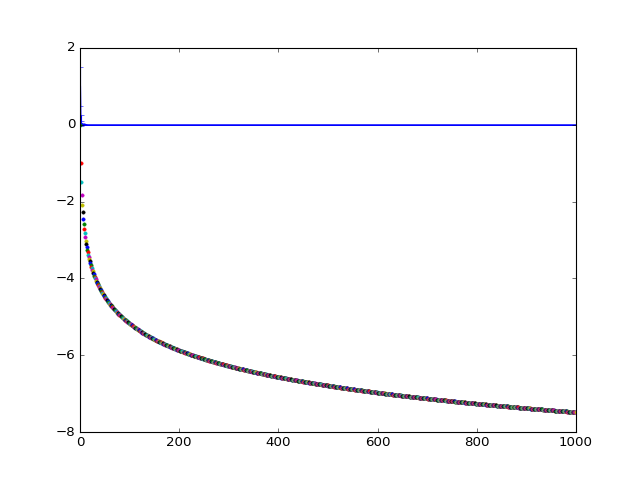

<Container object of 3 artists>

In [62]:
def powerlaw(x,s):
    return x**s
def gaussian(x,a,b,c):
    return a*np.exp(-(x-b)**2/(2*c**2))
x = range(1,1000)
m = -3
plt.errorbar(x,[powerlaw(i,m)  for i in x],yerr = [i**(m+1)/(m+1)  for i in x])


<IPython.core.display.Javascript object>


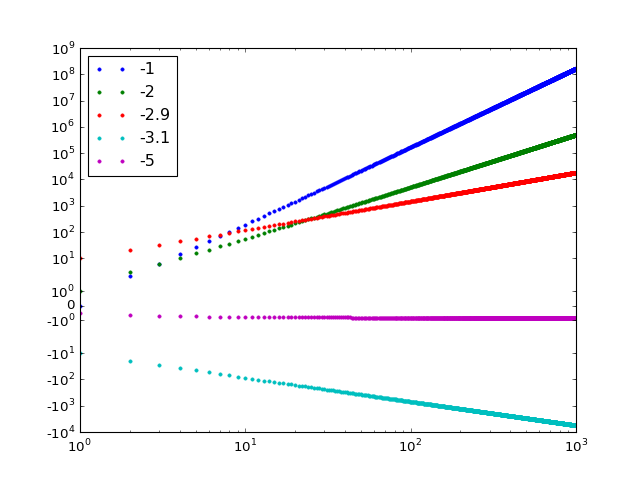

In [119]:
plt.figure()
for m in [-1,-2,-2.9,-3.1,-5]:
    cumulative_var = []
    for n in range(1,1000):
        x = [i for i in range(1,n)]
        cumulative_var.append((sum([i**(m+3)/(m+3)  for i in x])))
    plt.plot(cumulative_var,'.',label=m)
plt.xscale("log")
plt.yscale("symlog")
plt.legend(loc="best")

# plot probability vs clustersize with x range normalized, get contribution to >, < 60% percolation

In [356]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
import seaborn as sns
from susipop.susi.cache import SusiCache as cache

from sklearn import metrics

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)
progress_2 = widgets.IntProgress(min = 0, max = 100, value = 0)

a = 0.00868924612  
b = -0.106230138681
c = -0.198477972798
d = -7.21380690351

def predict_gap(shear_stress):
    if shear_stress > 0.14:
        i = shear_stress
        log_gap = a*np.log10(i)**4 +b*np.log10(i)**2 +c*np.log10(i) +d
        return 10**(log_gap)
    else:
        return 1e-10
    
def auc(x,y):
    try:
        return metrics.auc(x,y,reorder=False)
    except:
        return 0
    
def cluster_size_vs_probability_dynamic_gap(path_text_input,phis,shearrates, loglog,Individual_plots,viscosity_range,\
                                            normalize=True):    
    plt.style.use("ggplot")
    if not Individual_plots:
        plt.figure(figsize=[6,3],dpi=300)
    else:
#         matplotlib.rcParams.update({'font.size': 8})
        plt.figure(figsize=[5*len(shearrates),5*len(phis)])

    n_fig = 0
    s_data = np.asarray([])
    ns_data = np.asarray([])
    for p,phi in enumerate(phis):
        for k,shearrate in enumerate(shearrates):
            n_fig += 1
            progress_2.value = int(float(n_fig)/(len(shearrates)*len(phis))*100)
            if Individual_plots: s_data, ns_data = np.asarray([]), np.asarray([])
            try:
                if len(path_text_input.strip())== 0:
                    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                else:
                    path = str(path_text_input)+"/rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                dataset = sp.reader.DataSet(path,particles=True, fluid=False)
                print len(dataset.tlist), "steps available"
                npart = dataset.npart
                cache_file = cache(cachefile=dataset.cachefile)
                viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
                viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
                viscosity_non_relative = np.array(viscosity_file[viscosity_file.columns[2]][1:])
                idx_visc = np.where((viscosity <= viscosity_range[1]) & (viscosity >= viscosity_range[0]))[0]
                for i,t in enumerate([dataset.tlist[j] for j in idx_visc]):
                    progress_1.value = int(float(i)/len(idx_visc)*100)
                    try:
                        if cache_file.has_data(t,"cluster_size_distribution_dynamic_gap"):
                            label_cache.value =  "loading data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                            s, ns = cache_file.load_data(t,"cluster_size_distribution_dynamic_gap")
                            idx = np.where(ns != 0)[0]
                            s_data = np.concatenate([s_data , s[idx]])
                            ns_data = np.concatenate([ns_data , ns[idx]])
                            label1.value = str(s[idx])
                        else:
                            label_cache.value = "saving data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                            dataset.load_state(t)
                            shear_stress = viscosity_non_relative[idx_visc[i]]*shearrate

                            gap = predict_gap(shear_stress)
                            print shear_stress, gap, i
                            s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                            cache_file.save_data(t,{"cluster_size_distribution_dynamic_gap":[s, ns]})
                            idx = np.where(ns != 0)[0]
                            s_data = np.concatenate([s_data , s[idx]])
                            ns_data = np.concatenate([ns_data , ns[idx]])
                            label1.value = str(s[idx])
                    except Exception as e:
                            print e 
                            continue

                try:
                    if Individual_plots:
                        uniq_sizes = np.unique(s_data)
                        ns_data_cumulative = np.zeros_like(uniq_sizes)
                        for i, item in enumerate(uniq_sizes):
                            idx_uniq = np.where(s_data == item)[0]
                            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                        ns_temp_tot = ns_data_cumulative
                        nx_plots = len(phis)
                        ny_plots = len(shearrates)

                        plt.subplot(nx_plots, ny_plots,n_fig)
                        print (p+1)*(k+1)
                        if loglog:
                            if not normalize: 
                                plt.loglog(uniq_sizes,ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                            else:
                                plt.plot(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                                plt.yscale("log")
                                plt.xscale("linear")
                        else:
                            if not normalize:
                                plt.plot(uniq_sizes,ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                            else:
                                plt.plot(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                        
                        #plotting a vertical line at 60% cluster percolation
                        if not normalize: 
                            plt.axvline(x=0.6*npart,label="60% percolation")
                        else:
                            plt.axvline(x=0.6,label="60% percolation")
                        plt.xlabel("cluster size N")
                        plt.ylabel("cluster probability ")
                        if not normalize:
                            plt.xlim([1,2e3])
                        else: 
                            plt.xlim([0,1])
                        plt.ylim([1e-7,1])
                        plt.legend(loc="best")
                        
                        #data about area under curves
                        #-----------------------------
                        N,PN = uniq_sizes, ns_data_cumulative/float(sum(ns_data_cumulative))
                        idx_exp = np.where(N<0.6*npart)[0]
                        idx_bump = np.where(N>=0.6*npart)[0]
                        A_tot = auc(N/float(npart),np.log10(PN)) 
                        A_exp = auc(N[idx_exp]/float(npart),np.log10(PN[idx_exp]))/A_tot
                        A_bump = auc(N[idx_bump]/float(npart),np.log10(PN[idx_bump]))/A_tot
                        tot_P = sum(PN)
#                         plt.title("phi="+str(phi)+" yd="+str(shearrate)+" rel.visc: "+str(viscosity_range)+\
#                                   "\n A_exp,A_bump="+str([A_exp,A_bump,tot_P]),fontsize=10)
                        plt.title("phi="+str(phi)+" yd="+str(shearrate)+\
                                  " A_exp,A_bump="+str([round(A_exp,2),round(A_bump,2),round(tot_P,2)]),fontsize=10)
                    else:
                        mpl.rcParams.update({'font.size': 12})
                        
                        uniq_sizes = np.unique(s_data)
                        ns_data_cumulative = np.zeros_like(uniq_sizes)
                        for i, item in enumerate(uniq_sizes):
                            idx_uniq = np.where(s_data == item)[0]
                            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                        ns_temp_tot = ns_data_cumulative
                        nx_plots = len(phis)
                        ny_plots = len(shearrates)

                        print (p+1)*(k+1)
                        if loglog:
                            if not normalize:
                                plt.loglog(uniq_sizes,ns_data_cumulative/float(sum(ns_data_cumulative)),'k.')
                            else:
                                plt.loglog(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'k.',markersize=5)
                        else:
                            plt.plot(uniq_sizes,ns_data_cumulative,'.')
                        plt.xlabel("cluster size N")
                        plt.ylabel("cluster probability ")
                        plt.xticks(fontsize=12)
                        plt.yticks(fontsize=12)
#                         plt.xlim([1,2e3])
                        plt.ylim([1e-7,5])
                        plt.legend(loc="best")
#                         plt.title("phi="+str(phi)+" yd="+str(shearrate)+" rel.visc: "+str(viscosity_range),fontsize=10)
                except Exception as e:
                    continue

            except Exception as e:
                print e

    if not Individual_plots:
        uniq_sizes = np.unique(s_data)
        ns_data_cumulative = np.zeros_like(uniq_sizes)
        ns_data_sd = np.zeros_like(uniq_sizes)
        for i, item in enumerate(uniq_sizes):
            idx_uniq = np.where(s_data == item)[0]
            ns_data_cumulative[i] = sum(ns_data[idx_uniq])
            ns_data_sd[i] = np.std(ns_data[idx_uniq])
        x,y = uniq_sizes, ns_data_cumulative

        if loglog:
            plt.plot(x/float(npart),  y/float(sum(y)))
        else:
            plt.plot(x,  y/float(sum(y)),'o')
            plt.plot(x,  y/float(sum(y)),linewidth=0.1)
        plt.xscale("log")
        plt.yscale("log")
        
        if normalize: 
            plt.xlabel("normalized cluster size N")
        else:
            plt.xlabel("cluster size N")
            
        plt.ylabel("cluster probability ")
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        
        mpl.rcParams.update({'font.size': 14})
        plt.legend(loc="best")
        plt.tight_layout()
    
    
widget_cluster_size_vs_probability_dynamic_gap = interactive(cluster_size_vs_probability_dynamic_gap, \
    path_text_input = widgets.Text(value="./"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58], value = [56]), \
    shearrates= widgets.SelectMultiple(options=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], 
                                       value=[10,20,30]),\
    loglog = widgets.RadioButtons(options=[True,False],value = True),\
    Individual_plots = widgets.RadioButtons(options=[True,False],value = True),\
    viscosity_range = widgets.IntRangeSlider(min=1,max=1e6,value=[1,100000]),\
    __manual = True)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_cluster_size_vs_probability_dynamic_gap.children[0])
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[1:4]))
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[4:]))
display(label1)
display(progress_2)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installe

# plot probability vs clustersize with x range normalized, get contribution to >, < variable % percolation

<IPython.core.display.Javascript object>


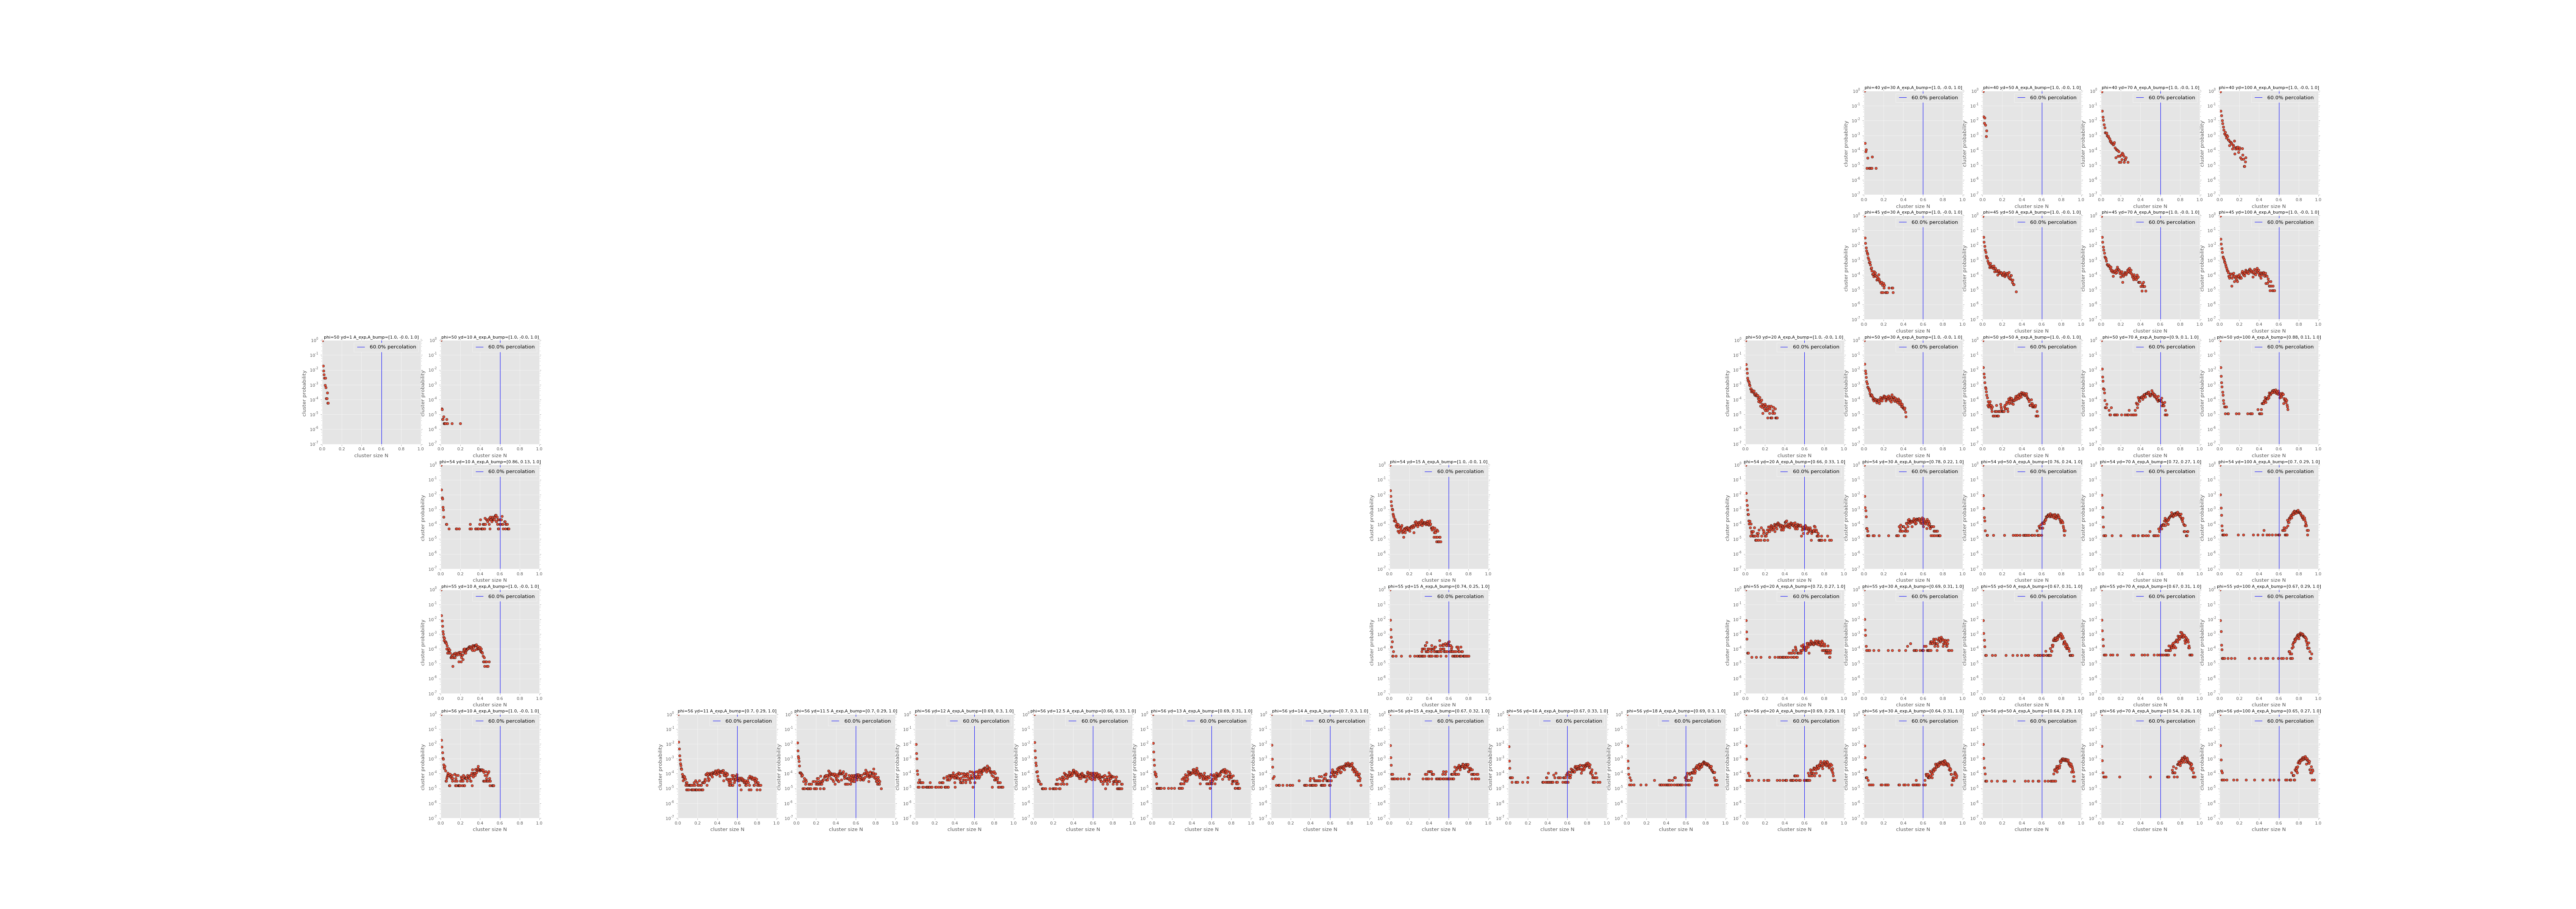

[Errno 2] No such file or directory: './/rhor1_phi40_yd1.0/sample/info.json'
22 steps available
[Errno 2] No such file or directory: './/rhor1_phi40_yd10.5/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd11.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd11.5/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd12.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd12.5/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd13.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd14.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd15.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd16.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd18.0/config.json'
[Errno 2] No such file or directory: './/rhor1_phi40_yd20.0/config.json'
1002 steps available
14
19 steps available
15
1001 steps available
16
1002 steps available
17
[Errno 

In [520]:
import os
import sys
import numpy as np
import pandas as pd
import subprocess
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import itertools
from susipop import filter
from susipop import reader
from IPython.html.widgets import FloatProgress
from IPython.display import display
from ipywidgets import interactive
import ipywidgets as widgets
%matplotlib notebook

import plotly
import susipop as sp

from multiprocessing import Pool
from scipy.interpolate import griddata

def get_folder_list():
    f = next(os.walk('.'))[1]
    return f
import seaborn as sns
from susipop.susi.cache import SusiCache as cache

from sklearn import metrics

label1 = widgets.Label("")
label_cache = widgets.Label(value = "")
progress_1 = widgets.IntProgress(min = 0, max = 100, value = 0)
progress_2 = widgets.IntProgress(min = 0, max = 100, value = 0)

a = 0.00868924612  
b = -0.106230138681
c = -0.198477972798
d = -7.21380690351

def predict_gap(shear_stress):
    if shear_stress > 0.14:
        i = shear_stress
        log_gap = a*np.log10(i)**4 +b*np.log10(i)**2 +c*np.log10(i) +d
        return 10**(log_gap)
    else:
        return 1e-10
    
def auc(x,y):
    try:
        return metrics.auc(x,y,reorder=False)
    except:
        return 0


bump_fraction = []
def cluster_size_vs_probability_dynamic_gap(path_text_input,phis,shearrates, display,Individual_plots,viscosity_range,power_law_limit=0.6):  
    if display:
        plt.style.use("ggplot")
        plt.figure(figsize=[5*len(shearrates),5*len(phis)])
    n_fig = 0
    s_data = np.asarray([])
    ns_data = np.asarray([])
    for p,phi in enumerate(phis):
        for k,shearrate in enumerate(shearrates):
            n_fig += 1
            progress_2.value = int(float(n_fig)/(len(shearrates)*len(phis))*100)
            if Individual_plots: s_data, ns_data = np.asarray([]), np.asarray([])
            try:
                if len(path_text_input.strip())== 0:
                    path = "rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                else:
                    path = str(path_text_input)+"/rhor1_phi"+str(phi)+"_yd"+str(float(shearrate))
                dataset = sp.reader.DataSet(path,particles=True, fluid=False)
                print len(dataset.tlist), "steps available"
                npart = dataset.npart
                cache_file = cache(cachefile=dataset.cachefile)
                viscosity_file = pd.read_csv(path+"/result/nu_t.dat")
                viscosity = np.array(viscosity_file[viscosity_file.columns[4]][1:])
                viscosity_non_relative = np.array(viscosity_file[viscosity_file.columns[2]][1:])
                shear_stress_mean = np.mean(viscosity_non_relative*float(shearrate))
                idx_visc = np.where((viscosity <= viscosity_range[1]) & (viscosity >= viscosity_range[0]))[0]
                for i,t in enumerate([dataset.tlist[j] for j in idx_visc]):
                    progress_1.value = int(float(i)/len(idx_visc)*100)
                    try:
                        if cache_file.has_data(t,"cluster_size_distribution_dynamic_gap"):
                            label_cache.value =  "loading data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                            s, ns = cache_file.load_data(t,"cluster_size_distribution_dynamic_gap")
                            idx = np.where(ns != 0)[0]
                            s_data = np.concatenate([s_data , s[idx]])
                            ns_data = np.concatenate([ns_data , ns[idx]])
                            label1.value = str(s[idx])
                        else:
                            label_cache.value = "saving data for t="+str(t)+ " phi"+ str(phi)+" yd"+str(shearrate)
                            dataset.load_state(t)
                            shear_stress = viscosity_non_relative[idx_visc[i]]*shearrate

                            gap = predict_gap(shear_stress)
                            print shear_stress, gap, i
                            s, ns = dataset.get_quantity("cluster_size_distribution", gap = gap, update=True)
                            cache_file.save_data(t,{"cluster_size_distribution_dynamic_gap":[s, ns]})
                            idx = np.where(ns != 0)[0]
                            s_data = np.concatenate([s_data , s[idx]])
                            ns_data = np.concatenate([ns_data , ns[idx]])
                            label1.value = str(s[idx])
                    except Exception as e:
                            print e 
                            continue

                try:
                    uniq_sizes = np.unique(s_data)
                    ns_data_cumulative = np.zeros_like(uniq_sizes)
                    for i, item in enumerate(uniq_sizes):
                        idx_uniq = np.where(s_data == item)[0]
                        ns_data_cumulative[i] = sum(ns_data[idx_uniq])
                    ns_temp_tot = ns_data_cumulative
                    
                    #data about area under curves
                    #-----------------------------
                    
                    N,PN = uniq_sizes, ns_data_cumulative/float(sum(ns_data_cumulative))
                    
                    idx_exp = np.where(N<power_law_limit*npart)[0]
                    idx_bump = np.where(N>=power_law_limit*npart)[0]
                    
                    A_tot = auc(N/float(npart),np.log10(PN)) 
                    A_exp = auc(N[idx_exp]/float(npart),np.log10(PN[idx_exp]))/A_tot
                    A_bump = auc(N[idx_bump]/float(npart),np.log10(PN[idx_bump]))/A_tot
                    
                    M_exp = sum(PN[idx_exp])
                    M_bump= sum(PN[idx_bump])
                    
                    tot_P = sum(PN)
                    if (A_exp == 0) & (A_bump==0): 
                        pass
                    else:
                        bump_fraction.append([phi,shearrate,A_exp,A_bump,M_exp,M_bump,shear_stress_mean])
                    
                    print (p+1)*(k+1)
                    if display:
                        nx_plots = len(phis)
                        ny_plots = len(shearrates)
                        plt.subplot(nx_plots, ny_plots,n_fig)
                        plt.plot(uniq_sizes/float(npart),ns_data_cumulative/float(sum(ns_data_cumulative)),'o')
                        plt.yscale("log")
                        plt.xscale("linear")
                        #plotting a vertical line at 60% cluster percolation
                        plt.axvline(x=power_law_limit,label=str(power_law_limit*100)+"% percolation")
                        plt.xlabel("cluster size N")
                        plt.ylabel("cluster probability ")
                        plt.xlim([0,1])
                        plt.ylim([1e-7,1])
                        plt.legend(loc="best")
                        plt.title("phi="+str(phi)+" yd="+str(shearrate)+\
                                  " A_exp,A_bump="+str([round(A_exp,2),round(A_bump,2),round(tot_P,2)]),fontsize=10)
                except Exception as e:
                    continue

            except Exception as e:
                print e
                
    


widget_cluster_size_vs_probability_dynamic_gap = interactive(cluster_size_vs_probability_dynamic_gap, \
    path_text_input = widgets.Text(value="./"),\
    phis = widgets.SelectMultiple(options=[40,45,50,54,55,56,58], value = [40,45,50,54,55,56]), \
    shearrates= widgets.SelectMultiple(options=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100,200,300,1000], 
                                       value=[1,10,10.5,11,11.5,12,12.5,13,14,15,16,18,20,30,50,70,100]),\
    display = widgets.RadioButtons(options=[True,False],value = True),\
    Individual_plots = widgets.RadioButtons(options=[True,False],value = True),\
    viscosity_range = widgets.IntRangeSlider(min=1,max=1e6,value=[1,100000]),\
    __manual = True)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_cluster_size_vs_probability_dynamic_gap.children[0])
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[1:4]))
display(widgets.HBox(widget_cluster_size_vs_probability_dynamic_gap.children[4:]))
display(label1)
display(progress_2)
display(progress_1)
display(label_cache)
# for i,item in enumerate(pdf_average.children):
#     print i, item.description 
# display(widget_cluster_size_distribution_matplotlib)
# display(widgets.HBox(cluster_size_distribution.children[4:]))


[[  4.00000000e+01   3.00000000e+01   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   1.12214728e-01]
 [  4.00000000e+01   5.00000000e+01   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   1.97365539e-01]
 [  4.00000000e+01   7.00000000e+01   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   2.97628940e-01]
 [  4.00000000e+01   1.00000000e+02   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   4.35875165e-01]
 [  4.50000000e+01   3.00000000e+01   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   1.78380070e-01]
 [  4.50000000e+01   5.00000000e+01   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   3.38972830e-01]
 [  4.50000000e+01   7.00000000e+01   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   5.41794259e-01]
 [  4.50000000e+01   1.00000000e+02   1.00000000e+00  -0.00000000e+00
    1.00000000e+00   0.00000000e+00   9.69087349e-01]
 [  5.00

<IPython.core.display.Javascript object>


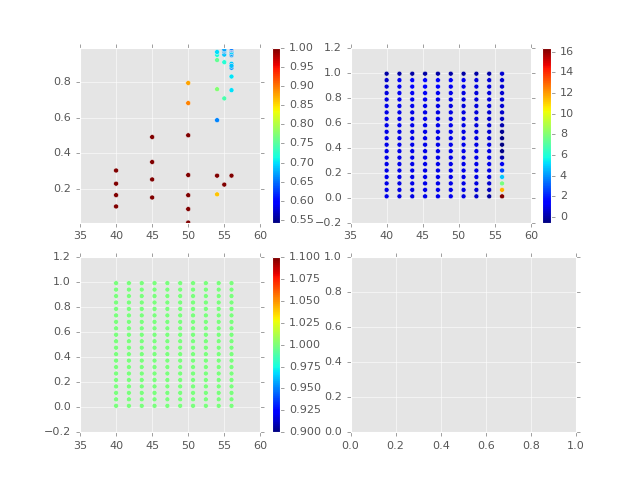

min=0.542935967708, max=1.0
min=-0.540719342941, max=16.3692080496
min=1.0, max=1.0
min=0.557581960961, max=1.62573263737


<IPython.core.display.Javascript object>


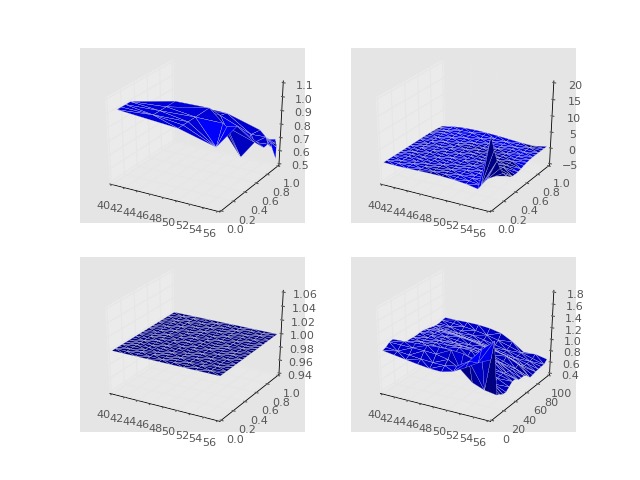

<IPython.core.display.Javascript object>


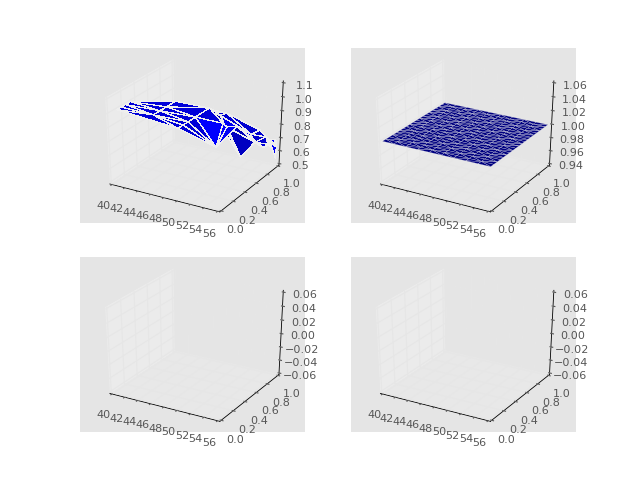

<IPython.core.display.Javascript object>


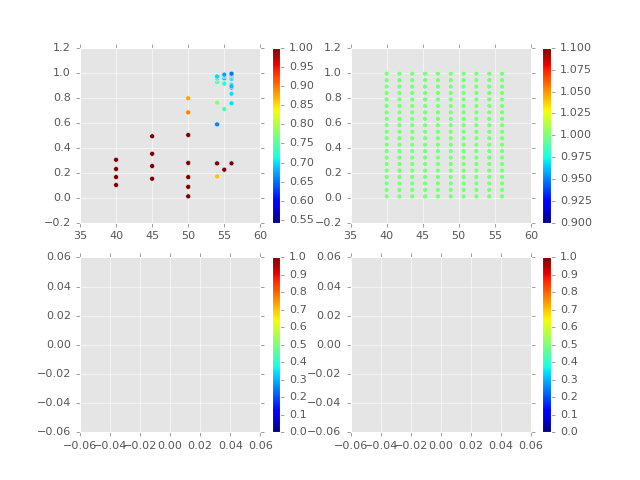

In [522]:
# print bump_fraction
bump_fraction = np.array(bump_fraction)
print bump_fraction
x = bump_fraction[:,0] #phi
y = bump_fraction[:,6] # 6 for shear stress, 1 for shearrate
#converting shearstress to friction percent
y = [float(i)/(1.0+i) for i in y]
z = bump_fraction[:,2] #area exp

shear_min, shear_max = min(y), max(y)

plt.figure()

plt.subplot(221)
plt.scatter(x,y,c=z)
plt.colorbar()
# plt.yscale("log")
plt.ylim([shear_min, shear_max])

plt.subplot(222)
from scipy import interpolate
# xnew, ynew = np.mgrid[40:56:10j, 1:100:20j]
xnew, ynew = np.mgrid[40:56:10j, shear_min:shear_max:20j]
tck = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], tck)
plt.scatter(xnew.flatten(), ynew.flatten(), c = znew.flatten())
plt.colorbar()

plt.subplot(223)
# grid_x, grid_y = np.mgrid[40:56:10j, 1:100:20j]
grid_x, grid_y = np.mgrid[40:56:10j, shear_min:shear_max:20j]
points, values = bump_fraction[:,:2],z
grid_z = griddata(points, values, (grid_x, grid_y), method='cubic')
grid_z[np.isnan(grid_z)]=1
plt.scatter(grid_x.flatten(), grid_y.flatten(), c = grid_z.flatten())
plt.colorbar()


plt.subplot(224)
# from scipy.interpolate import Rbf
# from matplotlib import cm
# tx = np.linspace(40, 56, 10)
# ty = np.linspace(1, 100, 20)
# XI, YI = np.meshgrid(tx, ty)
# rbf = Rbf(x, y, z, epsilon=2)
# ZI = rbf(XI, YI)
# plt.scatter(XI.flatten(), YI.flatten(), c = ZI.flatten())
# plt.colorbar()
# plt.pcolor(XI, YI, ZI, cmap=cm.jet)
# plt.colorbar()

# for i in range(len(xnew.flatten())):
#     print xnew.flatten()[i], ynew.flatten()[i], znew.flatten()[i]
# print "\n"
# print bump_fraction[:,:3]

def stats(arr):
    print "min="+str(min(arr.flatten()))+", max="+str(max(arr.flatten()))



stats(bump_fraction[:,2])
stats(znew)
stats(grid_z)
stats(ZI)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)
ax = fig.add_subplot(222, projection='3d')
ax.plot_trisurf(xnew.flatten(), ynew.flatten(), znew.flatten(), linewidth=0.2, antialiased=True)
ax = fig.add_subplot(223, projection='3d')
ax.plot_trisurf(grid_x.flatten(), grid_y.flatten(), grid_z.flatten(), linewidth=0.2, antialiased=True)
ax = fig.add_subplot(224, projection='3d')
ax.plot_trisurf(XI.flatten(), YI.flatten(), ZI.flatten(), linewidth=0.2, antialiased=True)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=False)
ax = fig.add_subplot(222, projection='3d')
ax.plot_trisurf(xnew.flatten(), ynew.flatten(), griddata(points, values, (grid_x, grid_y), method='nearest').flatten(), linewidth=0.2, antialiased=True)
ax = fig.add_subplot(223, projection='3d')
ax.plot_trisurf(xnew.flatten(), ynew.flatten(), griddata(points, values, (grid_x, grid_y), method='linear').flatten(), linewidth=0.2, antialiased=True)
ax = fig.add_subplot(224, projection='3d')
ax.plot_trisurf(xnew.flatten(), ynew.flatten(), griddata(points, values, (grid_x, grid_y), method='cubic').flatten(), linewidth=0.2, antialiased=True)


fig = plt.figure()
ax = fig.add_subplot(221)
plt.scatter(x, y, c=z)
plt.colorbar()
ax = fig.add_subplot(222)
plt.scatter(xnew.flatten(), ynew.flatten(), c=griddata(points, values, (grid_x, grid_y), method='nearest').flatten())
plt.colorbar()
ax = fig.add_subplot(223)
plt.scatter(xnew.flatten(), ynew.flatten(), c=griddata(points, values, (grid_x, grid_y), method='linear').flatten())
plt.colorbar()

ax = fig.add_subplot(224)
plt.scatter(xnew.flatten(), ynew.flatten(), c=griddata(points, values, (grid_x, grid_y), method='cubic').flatten())
plt.colorbar()

In [474]:
#simulation data
data_sim =\
[[40.0,10.0,  3.87962112188],\
[40.0,1.0,  3.71785820242],\
[40.0,100.0, 4.34942417199],\
[40.0,1000.0,6.02568141539],\
[45.0,1.0,   6.60787285534],\
[45.0,10.0,  5.81713213336],\
[45.0,100.0,9.66741895732 ],\
[45.0,1000.0,15.5083330192],\
[50.0,1.0,10.3207226523   ],\
[50.0,10.0,9.42763209067  ],\
[50.0,100.0,39.0873077246 ],\
[50.0,1000.0,45.2619269599],\
[55.0,1.0,22.0550800039   ],\
[55.0,10.0,28.8159170317  ],\
[55.0,100.0,741.653633596 ],\
[45.0,50.0,6.7648709733   ],\
[50.0,50.0,20.1149016702  ],\
[40.0,70.0,4.24286204484  ],\
[45.0,70.0,7.72237321005  ],\
[40.0,30.0,3.73314074903  ],\
[45.0,30.0,5.93406389665  ],\
[50.0,30.0,12.8055645201  ],\
[40.0,50.0,3.93027858399  ],\
[50.0,70.0,30.7790714206  ],\
[55.0,30.0,736.084086648  ],\
[55.0,50.0,763.079083333  ],\
[55.0,70.0,773.095621633  ],\
[50.0,20.0,9.80963010776  ],\
[55.0,20.0,528.744126351  ],\
[40.0,300.0,6.00419575815 ],\
[40.0,600.0,5.73644077191 ],\
[45.0,300.0,14.2867186965 ],\
[55.0,15.0,162.300511273  ],\
[40.0,200.0,5.16298755714 ],\
[45.0,200.0,12.5659741787 ],\
[50.0,300.0,47.7222212133 ],\
[56.0,16.0,1558.95688025  ],\
[54.0,1.0,22.3938642769   ],\
[54.0,10.0,20.3090491108  ],\
[54.0,20.0,70.9319072565  ],\
[54.0,30.0,106.288514307  ],\
[54.0,50.0,249.300036467  ],\
[54.0,70.0,302.979343435  ],\
[54.0,100.0,339.700764937 ],\
[54.0,300.0,280.592114494 ],\
[56.0,1.0,30.7211440813   ],\
[56.0,10.0,37.7684072084  ],\
[56.0,20.0,2530.92119269  ],\
[56.0,30.0,2346.37973488  ],\
[56.0,50.0,2115.42930221  ],\
[56.0,70.0,1924.00833314  ],\
[56.0,100.0,1667.16650322 ],\
[56.0,300.0,1691.05188929 ],\
[56.0,11.0,281.179511502  ],\
[56.0,11.5,433.123349365  ],\
[54.0,15.0,25.1593269812  ],\
[56.0,15.0,1349.72573507  ],\
[56.0,14.0,2104.34432919  ],\
[56.0,12.5,600.863242519  ],\
[56.0,12.0,791.825809721  ],\
[56.0,18.0,1808.07303234  ],\
[56.0,13.0,644.926008102  ]]


<IPython.core.display.Javascript object>


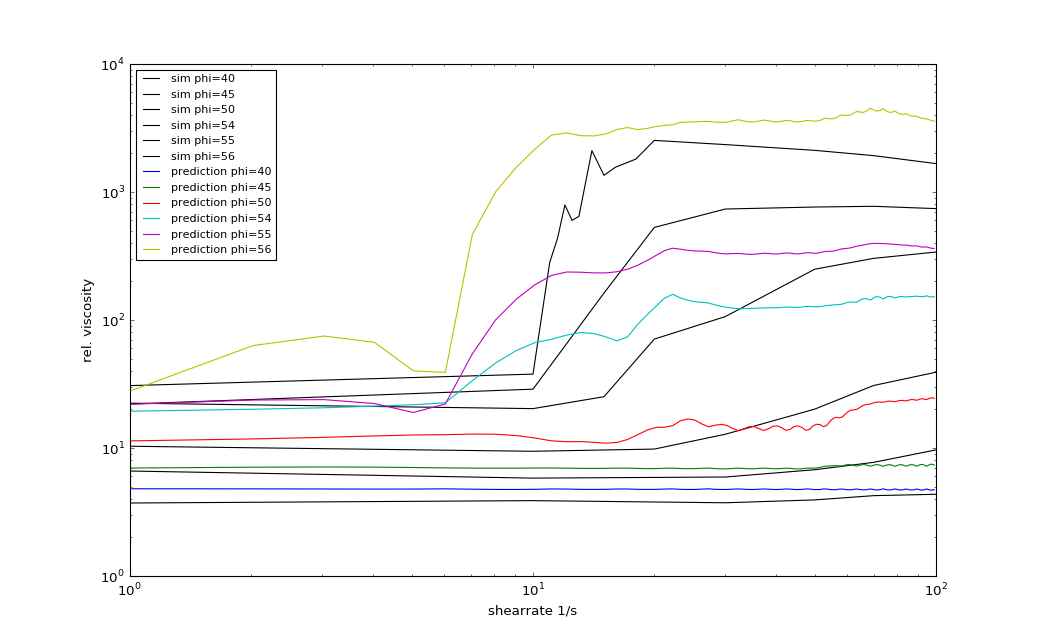

In [500]:
plt.figure()
bump_fraction = np.array(bump_fraction)
tx = np.linspace(40, 56, 10)
ty = np.linspace(1, 100, 20)
grid_x, grid_y  = np.meshgrid(tx, ty)

points, values = bump_fraction[:,:2],bump_fraction[:,2]

grid_z = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z[np.isnan(grid_z)]=1
plt.subplot(121)
plt.scatter(grid_x.flatten(), grid_y.flatten(), c = grid_z.flatten())
plt.colorbar()

import scipy.interpolate as interp
# f = interpolate.interp2d(tx, ty, grid_z, kind='quintic')
f = interp.Rbf(grid_x.flatten(), grid_y.flatten(), grid_z.flatten(), function='linear', smooth=0)  # default smooth=0 for interpolation
# f = interp.Rbf(bump_fraction[:,0], bump_fraction[:,1], bump_fraction[:,2], function='linear', smooth=0)  # default smooth=0 for interpolation

plt.subplot(122)
grid_zf = f(grid_x.flatten(), grid_y.flatten())
plt.scatter(grid_x.flatten(), grid_y.flatten(), c = grid_zf)
plt.colorbar()


#fitting values to test mixing rule
def kd(p,pmax):
    return (1-float(p)/pmax)**(-2.5*pmax)

def mr(phi,yd,A,B):
    visc_low = kd(phi/100.0,0.64)
    visc_high = kd(phi/100.0,0.5625)
    return A*visc_low*f(phi,yd) + B*visc_high*(1-f(phi,yd))

def mr2(phi,yd,A,B):
    visc_low = kd(phi/100.0,0.64)
    visc_high = kd(phi/100.0,0.5625)
    return visc_low*np.exp(A*f(phi,yd)) + visc_high*np.exp(B*(1-f(phi,yd)))

def plot_cluster_viscosity_prediction(A,B,phivals):
    data_sim =\
    [[40.0,10.0,  3.87962112188],\
    [40.0,1.0,  3.71785820242],\
    [40.0,100.0, 4.34942417199],\
    [40.0,1000.0,6.02568141539],\
    [45.0,1.0,   6.60787285534],\
    [45.0,10.0,  5.81713213336],\
    [45.0,100.0,9.66741895732 ],\
    [45.0,1000.0,15.5083330192],\
    [50.0,1.0,10.3207226523   ],\
    [50.0,10.0,9.42763209067  ],\
    [50.0,100.0,39.0873077246 ],\
    [50.0,1000.0,45.2619269599],\
    [55.0,1.0,22.0550800039   ],\
    [55.0,10.0,28.8159170317  ],\
    [55.0,100.0,741.653633596 ],\
    [45.0,50.0,6.7648709733   ],\
    [50.0,50.0,20.1149016702  ],\
    [40.0,70.0,4.24286204484  ],\
    [45.0,70.0,7.72237321005  ],\
    [40.0,30.0,3.73314074903  ],\
    [45.0,30.0,5.93406389665  ],\
    [50.0,30.0,12.8055645201  ],\
    [40.0,50.0,3.93027858399  ],\
    [50.0,70.0,30.7790714206  ],\
    [55.0,30.0,736.084086648  ],\
    [55.0,50.0,763.079083333  ],\
    [55.0,70.0,773.095621633  ],\
    [50.0,20.0,9.80963010776  ],\
    [55.0,20.0,528.744126351  ],\
    [40.0,300.0,6.00419575815 ],\
    [40.0,600.0,5.73644077191 ],\
    [45.0,300.0,14.2867186965 ],\
    [55.0,15.0,162.300511273  ],\
    [40.0,200.0,5.16298755714 ],\
    [45.0,200.0,12.5659741787 ],\
    [50.0,300.0,47.7222212133 ],\
    [56.0,16.0,1558.95688025  ],\
    [54.0,1.0,22.3938642769   ],\
    [54.0,10.0,20.3090491108  ],\
    [54.0,20.0,70.9319072565  ],\
    [54.0,30.0,106.288514307  ],\
    [54.0,50.0,249.300036467  ],\
    [54.0,70.0,302.979343435  ],\
    [54.0,100.0,339.700764937 ],\
    [54.0,300.0,280.592114494 ],\
    [56.0,1.0,30.7211440813   ],\
    [56.0,10.0,37.7684072084  ],\
    [56.0,20.0,2530.92119269  ],\
    [56.0,30.0,2346.37973488  ],\
    [56.0,50.0,2115.42930221  ],\
    [56.0,70.0,1924.00833314  ],\
    [56.0,100.0,1667.16650322 ],\
    [56.0,300.0,1691.05188929 ],\
    [56.0,11.0,281.179511502  ],\
    [56.0,11.5,433.123349365  ],\
    [54.0,15.0,25.1593269812  ],\
    [56.0,15.0,1349.72573507  ],\
    [56.0,14.0,2104.34432919  ],\
    [56.0,12.5,600.863242519  ],\
    [56.0,12.0,791.825809721  ],\
    [56.0,18.0,1808.07303234  ],\
    [56.0,13.0,644.926008102  ]]

    plt.style.use("classic")
    plt.figure(figsize=[13,8])
    
    data_sim = np.array(data_sim)
    data_sim = data_sim.transpose()
    _phi = data_sim[0]
    _yd= data_sim[1]
    _visc = data_sim[2]
    for p in phivals:
        _idx = np.where(_phi == p)[0]
        x,y = _yd[_idx],_visc[_idx]
        new_x, new_y = zip(*sorted(zip(x, y)))
        plt.loglog(new_x, new_y,'k-',label="sim phi="+str(p))
    
    # plt.subplot(211)
    plt.xlabel("shearrate 1/s")
    plt.ylabel("rel. viscosity")
    sr = range(1,100)
    from scipy.interpolate import spline
    for p in phivals:
#     for p in range(40,58,2):
        xnew = np.linspace(0,100,100)
        power_smooth = spline(sr,[mr(p,yd_,A,B) for yd_ in sr],xnew)
        plt.plot(xnew, power_smooth,label="prediction phi="+str(p) )
#         plt.loglog(sr,[mr(p,yd_,A,B) for yd_ in sr],label="prediction phi="+str(p))
    plt.xlim([0,100])
    plt.plot()
    plt.legend(loc="best", fontsize = 10)

# def plot_cluster_viscosity_prediction(A,B):
#     # plt.subplot(211)
#     fig = figure(title="simple line example", plot_height=300, plot_width=300)
#     sr = range(1,100)
#     for p in [40,45,50,54,55,56]:
#         fig.line(sr, [mr(p,yd_,A,B) for yd_ in sr])
#     show(fig,notebook_handle=True)
#     interact()
#     plt.figure()
#     # plt.subplot(212)
#     import urllib2
#     # create a file-like object from the url
#     img = urllib2.urlopen("https://dl.dropboxusercontent.com/s/tcr69pf5d71nlfw/viscosity_vs_shearrate_no_errorbars.png")
#     # read the image file in a numpy array
#     a = plt.imread(img)
#     plt.imshow(a)
#     plt.axis('off')

widget_plot_cluster_viscosity_prediction = interactive(plot_cluster_viscosity_prediction, \
    A = widgets.FloatSlider(value=1),
    B = widgets.FloatSlider(value=3),     
    phivals =  widgets.SelectMultiple(options= [40,45,50,54,55,56],value =[40,45,50,54,55,56] ),
    __manual = False)
# display(widget_cluster_size_vs_viscosity_matplotlib)
display(widget_plot_cluster_viscosity_prediction)